# INIT

In [17]:
import utility_module_2_v_3 as uu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def anom_mon(data):
  print(data.shape)
  data=np.reshape(data,(12,-1),order='F')
  data_clim=np.nanmean(data,axis=1)
  print(data_clim)
  data_anom=data-data_clim[:,np.newaxis]
  return data_anom.flatten(order='F')

# Read Ncar data

In [7]:
path_NCAR  ='/media/vikram/subimal/Raw_Data/NCAR_DATA/'

pres.sfc Pressure pres


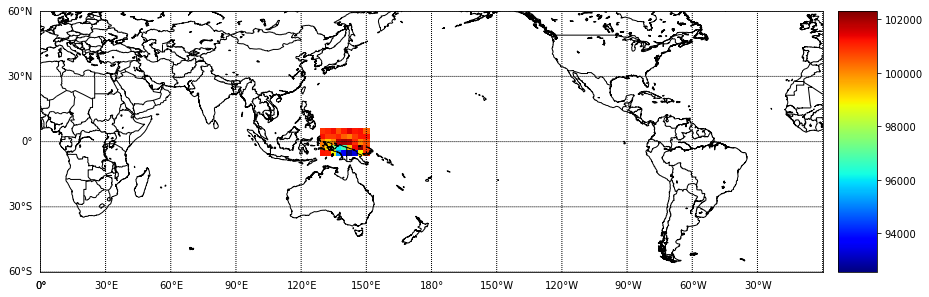

air.sig995 Temperature/Surface air


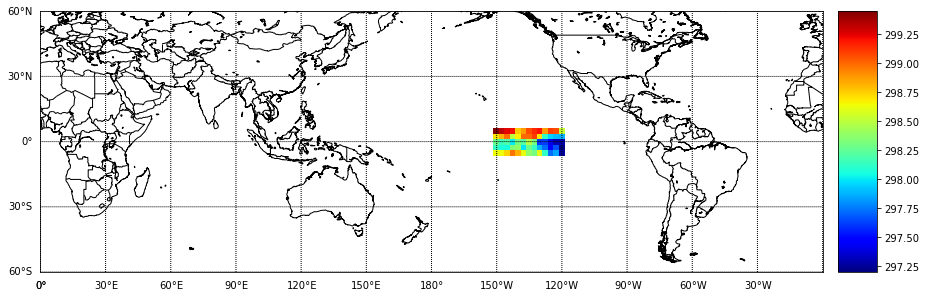

air.sig995 Temperature/Surface air


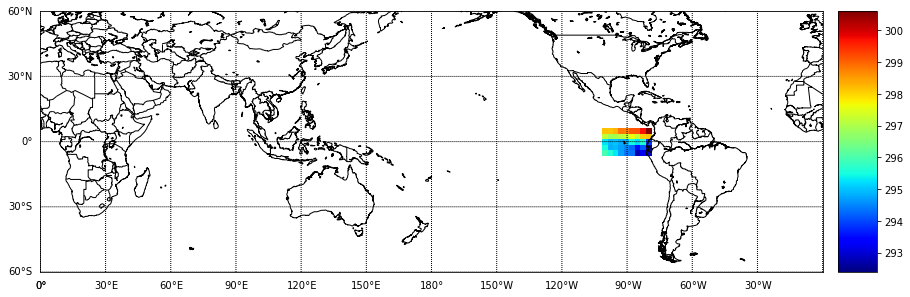

air.sig995 Temperature/Surface air


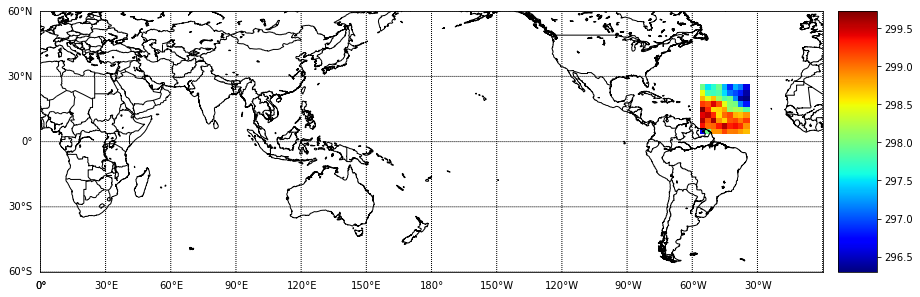

In [8]:
# 'omega.sig995'  ,'omega' ,'Omega'  , 'uwnd', 'uwnd', 'Wind/Levels', 'dswrf.sfc.gauss', 'dswrf', 'Solar radiation'
var_names=['prate.sfc.gauss','omega','skt.sfc.gauss','shtfl.sfc.gauss','shum.2m.gauss','air.sig995','lhtfl.sfc.gauss','pres.sfc']
var_nc_names=['prate','omega','skt','shtfl','shum','air','lhtfl','pres']
Folder_names=['Precipitation','Omega','Temperature/Skin','Sensible Heat Flux','Humidity','Temperature/Surface','Latent Heat Flux','Pressure']

st=1948
en=2005

#WPAC
delo=1
data_bounds_atl=[360-55+delo, 25, 360-35-delo, 5]
data_bounds_wpac=[130+delo, 5, 150-delo, -5]
data_bounds_cpac=[360-150+delo, 5, 360-120-delo, -5]
data_bounds_epac=[360-100+delo, 5, 360-80-delo, -5]

data_bounds=data_bounds_wpac

var_iters=[0,5,7]

iter=2
var_iter=var_iters[iter]
var_name=(var_names[var_iter])
Folder_name=(Folder_names[var_iter])
var_nc_name=(var_nc_names[var_iter])
print(var_name,Folder_name,var_nc_name)
path =path_NCAR + Folder_name+'/'+var_name+'.'
psl_ncar_WPAC,lat_obs_WPAC,lon_obs_WPAC=uu.extract_ncar(st,en,var_nc_name,path,data_bounds)
psl_ncar_WPAC=psl_ncar_WPAC[:,::-1,:]
lat_obs_WPAC=lat_obs_WPAC[::-1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(psl_ncar_WPAC[200,:,:],lat_obs_WPAC,lon_obs_WPAC,map_bounds,mp_spacing=30)

# CPAC
data_bounds=data_bounds_cpac

data_out=np.zeros((4,pd.date_range(start='01/01/'+str(st), end='12/31/'+str(en)).shape[0]))
iter=1
var_iter=var_iters[iter]
var_name=(var_names[var_iter])
Folder_name=(Folder_names[var_iter])
var_nc_name=(var_nc_names[var_iter])
print(var_name,Folder_name,var_nc_name)
path = path_NCAR + Folder_name+'/'+var_name+'.'
tas_ncar_CPAC,lat_obs_CPAC,lon_obs_CPAC=uu.extract_ncar(st,en,var_nc_name,path,data_bounds)
tas_ncar_CPAC=tas_ncar_CPAC[:,::-1,:]
lat_obs_CPAC=lat_obs_CPAC[::-1]

map_bounds=[0 ,60,360,-60]
mp_spacing=30
uu.map_plot_cyl(tas_ncar_CPAC[200,:,:],lat_obs_CPAC,lon_obs_CPAC,map_bounds,mp_spacing=mp_spacing)

# EPAC
data_bounds=data_bounds_epac
data_out=np.zeros((4,pd.date_range(start='01/01/'+str(st), end='12/31/'+str(en)).shape[0]))
var_iters=[0,5,7]
iter=1
var_iter=var_iters[iter]
var_name=(var_names[var_iter])
Folder_name=(Folder_names[var_iter])
var_nc_name=(var_nc_names[var_iter])
print(var_name,Folder_name,var_nc_name)
path = path_NCAR+ Folder_name+'/'+var_name+'.'
tas_ncar_EPAC,lat_obs_EPAC,lon_obs_EPAC=uu.extract_ncar(st,en,var_nc_name,path,data_bounds)
tas_ncar_EPAC=tas_ncar_EPAC[:,::-1,:]
lat_obs_EPAC=lat_obs_EPAC[::-1]
map_bounds=[0 ,60,360,-60]
mp_spacing=30
uu.map_plot_cyl(tas_ncar_EPAC[200,:,:],lat_obs_EPAC,lon_obs_EPAC,map_bounds,mp_spacing=mp_spacing)


# _ATL
data_bounds=data_bounds_atl
data_out=np.zeros((4,pd.date_range(start='01/01/'+str(st), end='12/31/'+str(en)).shape[0]))
var_iters=[0,5,7]
iter=1

var_iter=var_iters[iter]
var_name=(var_names[var_iter])
Folder_name=(Folder_names[var_iter])
var_nc_name=(var_nc_names[var_iter])
print(var_name,Folder_name,var_nc_name)
path = path_NCAR+ Folder_name+'/'+var_name+'.'
tas_ncar_ATL,lat_obs_ATL,lon_obs_ATL=uu.extract_ncar(st,en,var_nc_name,path,data_bounds)
tas_ncar_ATL=tas_ncar_ATL[:,::-1,:]
lat_obs_ATL=lat_obs_ATL[::-1]
map_bounds=[0 ,60,360,-60]
mp_spacing=30
uu.map_plot_cyl(tas_ncar_ATL[200,:,:],lat_obs_ATL,lon_obs_ATL,map_bounds,mp_spacing=mp_spacing)



In [9]:

psl_ncar_WPAC=uu.daily_to_monthly_sts(np.nanmean(psl_ncar_WPAC,axis=(1,2))[:,np.newaxis,np.newaxis],st,en,method='MEAN').flatten()
tas_ncar_CPAC=uu.daily_to_monthly_sts(np.nanmean(tas_ncar_CPAC,axis=(1,2))[:,np.newaxis,np.newaxis],st,en,method='MEAN').flatten()
tas_ncar_EPAC=uu.daily_to_monthly_sts(np.nanmean(tas_ncar_EPAC,axis=(1,2))[:,np.newaxis,np.newaxis],st,en,method='MEAN').flatten()
tas_ncar_ATL=uu.daily_to_monthly_sts(np.nanmean(tas_ncar_ATL,axis=(1,2))[:,np.newaxis,np.newaxis],st,en,method='MEAN').flatten()


Monthly data dimensions: (696, 1, 1)
Monthly data dimensions: (696, 1, 1)
Monthly data dimensions: (696, 1, 1)
Monthly data dimensions: (696, 1, 1)


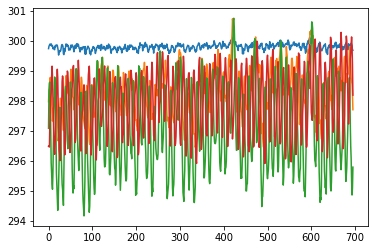

In [10]:
plt.plot(psl_ncar_WPAC/1000+200)
plt.plot(tas_ncar_CPAC)
plt.plot(tas_ncar_EPAC)
plt.plot(tas_ncar_ATL)

In [11]:
apsl_ncar_WPAC=anom_mon(psl_ncar_WPAC)
adata_ncar_CPAC=anom_mon(tas_ncar_CPAC)
adata_ncar_EPAC=anom_mon(tas_ncar_EPAC)
adata_ncar_ATL=anom_mon(tas_ncar_ATL)

(696,)
[99736.82165948 99763.27087823 99792.2498653  99795.19948815
 99805.86786099 99847.48693427 99850.79162177 99862.69854526
 99861.61678341 99815.63658405 99735.2423222  99715.38496767]
(696,)
[298.1314029  298.412494   298.75641658 299.06158552 299.00364001
 298.76878462 298.42356715 298.16356317 298.08471311 298.03301949
 297.99111781 298.01487048]
(696,)
[297.3845178  298.32242611 298.81773587 298.66423561 298.0294079
 297.19199924 296.43105079 295.84379051 295.60008135 295.61317654
 295.87173935 296.44931609]
(696,)
[296.8854991  296.52851815 296.61062885 297.00335641 297.57264078
 298.09372369 298.49984215 299.0160754  299.31055108 299.18587152
 298.59919897 297.69102794]


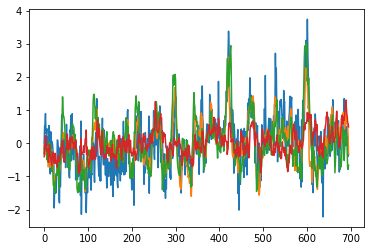

In [12]:
plt.plot(apsl_ncar_WPAC/100)
plt.plot(adata_ncar_CPAC)
plt.plot(adata_ncar_EPAC)
plt.plot(adata_ncar_ATL)


# Gcm init

In [13]:
from netCDF4 import Dataset

date_ts=pd.date_range(start=str(st)+'-01-01',end=str(en)+'-12-31')
print(date_ts[0],date_ts[-1])
N=date_ts.shape[0]
print("N:1948-2005::",st,en,N,105*(365.25))

1948-01-01 00:00:00 2005-12-31 00:00:00
N:1948-2005:: 1948 2005 21185 38351.25


# read GCM MIROC_ESM


In [14]:
# reading file(s)
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/'
filename = path_gcm +'/MIROC_ESM/psl_day_MIROC-ESM_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

# cropping years before 1948
st_gcm=1850
dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

psl_gcm_daily = fh.variables['psl'][index_of_st:,:,:].data
psl_gcm_monthly=uu.daily_to_monthly_sts(psl_gcm_daily,st,en,method='MEAN')



Monthly data dimensions: (696, 64, 128)


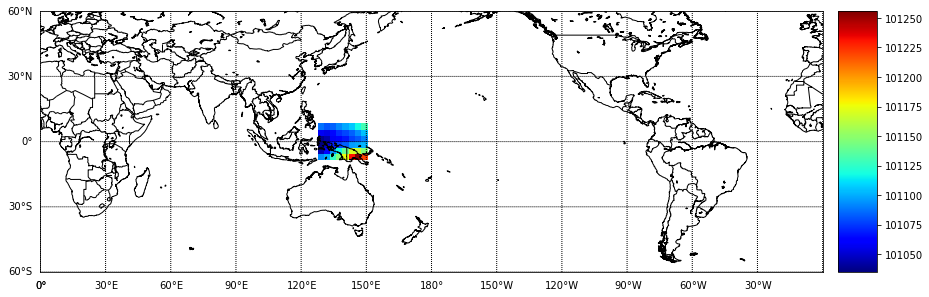

In [15]:
# cropping the study area out WPAC
data_bounds=data_bounds_wpac

l_lat,u_lat,lat_gcm_WPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_WPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
psl_gcm_WPAC=psl_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(psl_gcm_WPAC[200,:,:],lat_gcm_WPAC,lon_gcm_WPAC,map_bounds,mp_spacing=30)


In [16]:
# reading file(s)
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/'
gcm_name='MIROC_ESM'
filename = path_gcm+ gcm_name+'/tas_day_MIROC-ESM_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

# cropping years before 1948
st_gcm=1850
dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

tas_gcm_daily = fh.variables['tas'][index_of_st:,:,:].data
tas_gcm_monthly=uu.daily_to_monthly_sts(tas_gcm_daily,st,en,method='MEAN')



Monthly data dimensions: (696, 64, 128)


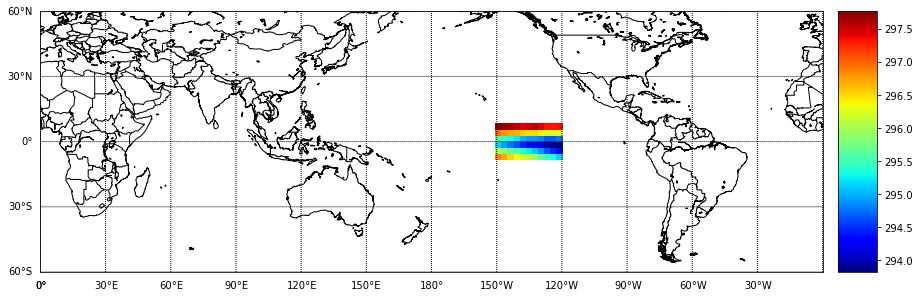

In [17]:
data_bounds=data_bounds_cpac
l_lat,u_lat,lat_gcm_CPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_CPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_CPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_CPAC[200,:,:],lat_gcm_CPAC,lon_gcm_CPAC,map_bounds,mp_spacing=30)


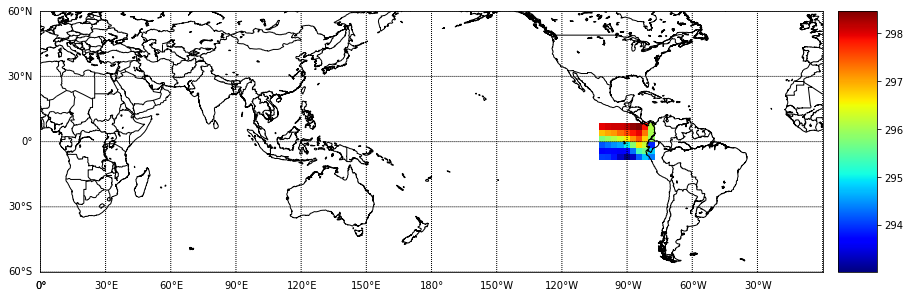

In [18]:
data_bounds=data_bounds_epac
l_lat,u_lat,lat_gcm_EPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_EPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_EPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_EPAC[200,:,:],lat_gcm_EPAC,lon_gcm_EPAC,map_bounds,mp_spacing=30)


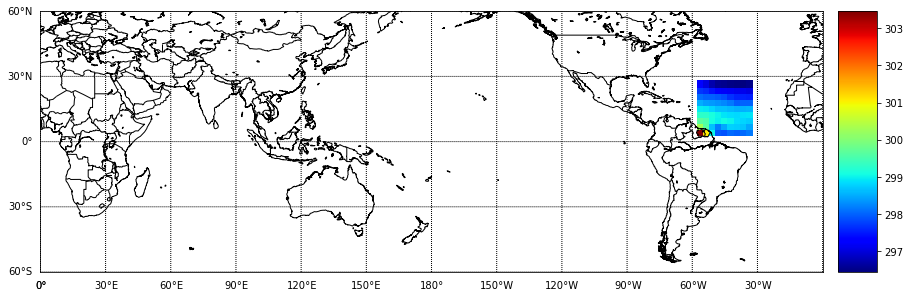

In [19]:
data_bounds=data_bounds_atl
l_lat,u_lat,lat_gcm_ATL=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_ATL=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_ATL=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_ATL[200,:,:],lat_gcm_ATL,lon_gcm_ATL,map_bounds,mp_spacing=30)


In [20]:

psl_gcm_01_WPAC=np.mean(psl_gcm_WPAC,axis=(1,2))
tas_gcm_01_CPAC=np.mean(tas_gcm_CPAC,axis=(1,2))
tas_gcm_01_EPAC=np.mean(tas_gcm_EPAC,axis=(1,2))
tas_gcm_01_ATL=np.mean(tas_gcm_ATL,axis=(1,2))

#

In [21]:
apsl_gcm_01_WPAC=anom_mon(psl_gcm_01_WPAC)
atas_gcm_01_CPAC=anom_mon(tas_gcm_01_CPAC)
atas_gcm_01_EPAC=anom_mon(tas_gcm_01_EPAC)
atas_gcm_01_ATL=anom_mon(tas_gcm_01_ATL)

(696,)
[100982.8401805  101014.14493815 101088.65799827 101142.57932325
 101134.93595939 101110.45206144 101064.15947995 101075.46384754
 101038.53692136 101017.8854756  101024.31310053 100984.00920438]
(696,)
[297.18281567 297.72075085 298.17386341 298.49974485 298.55792167
 298.10339512 297.34302993 296.67714875 296.35269577 296.31847759
 296.44092219 296.65491235]
(696,)
[297.46501318 297.80227718 298.17383493 298.43049644 298.23963666
 297.72639953 297.38493541 296.99885403 296.76430833 296.80155357
 296.92132141 297.13980421]
(696,)
[295.83444626 295.58626835 295.7621687  296.20588342 296.60861103
 297.12718867 297.68326553 298.12902006 298.31544241 298.14382399
 297.50917439 296.59402634]


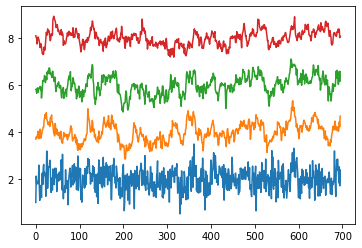

In [22]:
plt.plot(apsl_gcm_01_WPAC/100+2)
plt.plot(atas_gcm_01_CPAC+4)
plt.plot(atas_gcm_01_EPAC+6)
plt.plot(atas_gcm_01_ATL+8)

# read GCM CanESM2


In [23]:
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/CanESM2/'
filename =path_gcm +'psl_day_CanESM2_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

# cropping years before 1948
st_gcm=1850
dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

psl_gcm_daily = fh.variables['psl'][index_of_st:,:,:].data
psl_gcm_monthly=uu.daily_to_monthly_sts(psl_gcm_daily,st,en,method='MEAN')


Monthly data dimensions: (696, 64, 128)


/home/vikram/Dropbox/BCSD Work/03_Figures/utility_module_2_v_3.py:259: RuntimeWarning: Mean of empty slice
  data_monthly[itex,:,:]=np.nanmean(data_daily[year_index+ind_months[month_iter]:year_index+ind_months[month_iter+1],:,:],axis=0)


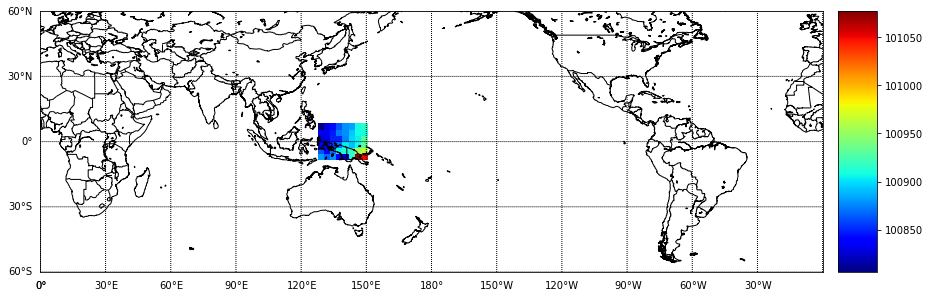

In [24]:
# cropping the study 50area out WPAC
data_bounds=data_bounds_wpac

l_lat,u_lat,lat_gcm_WPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_WPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
psl_gcm_WPAC=psl_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(psl_gcm_WPAC[200,:,:],lat_gcm_WPAC,lon_gcm_WPAC,map_bounds,mp_spacing=30)


In [25]:

path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/CanESM2/'
filename =path_gcm +'tas_day_CanESM2_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

# cropping years before 1948
st_gcm=1850
dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

tas_gcm_daily = fh.variables['tas'][index_of_st:,:,:].data
tas_gcm_monthly=uu.daily_to_monthly_sts(tas_gcm_daily,st,en,method='MEAN')



Monthly data dimensions: (696, 64, 128)


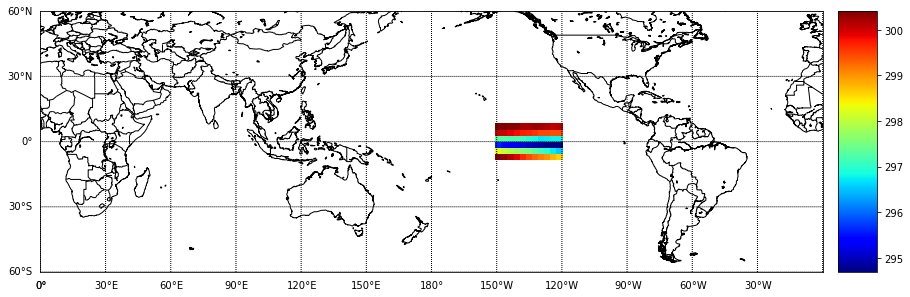

In [26]:
data_bounds=data_bounds_cpac
l_lat,u_lat,lat_gcm_CPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_CPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_CPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_CPAC[200,:,:],lat_gcm_CPAC,lon_gcm_CPAC,map_bounds,mp_spacing=30)


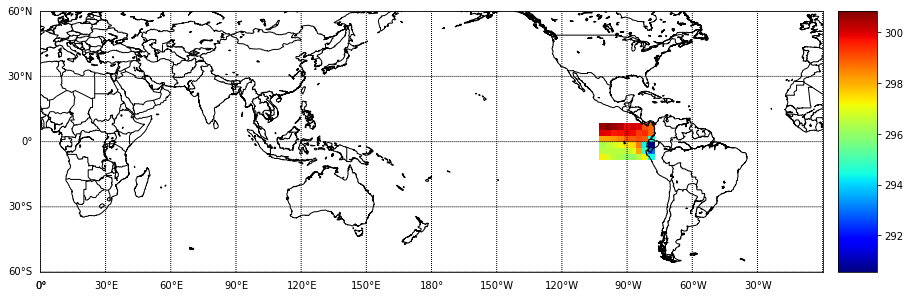

In [27]:
data_bounds=data_bounds_epac
l_lat,u_lat,lat_gcm_EPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_EPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_EPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_EPAC[200,:,:],lat_gcm_EPAC,lon_gcm_EPAC,map_bounds,mp_spacing=30)


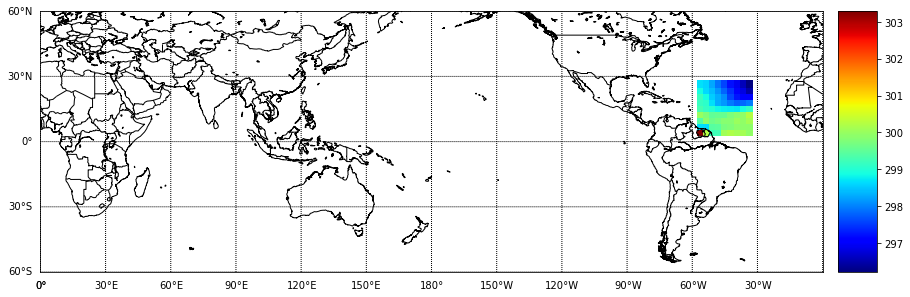

In [28]:
data_bounds=data_bounds_atl
l_lat,u_lat,lat_gcm_ATL=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_ATL=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_ATL=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_ATL[200,:,:],lat_gcm_ATL,lon_gcm_ATL,map_bounds,mp_spacing=30)


In [29]:

psl_gcm_02_WPAC=np.mean(psl_gcm_WPAC,axis=(1,2))
tas_gcm_02_CPAC=np.mean(tas_gcm_CPAC,axis=(1,2))
tas_gcm_02_EPAC=np.mean(tas_gcm_EPAC,axis=(1,2))
tas_gcm_02_ATL=np.mean(tas_gcm_ATL,axis=(1,2))

#

In [30]:
apsl_gcm_02_WPAC=anom_mon(psl_gcm_02_WPAC)
atas_gcm_02_CPAC=anom_mon(tas_gcm_02_CPAC)
atas_gcm_02_EPAC=anom_mon(tas_gcm_02_EPAC)
atas_gcm_02_ATL=anom_mon(tas_gcm_02_ATL)

(696,)
[100828.85351282 100905.4449505  100943.96363147 100983.97201924
 100978.90144857 100953.73401019 100915.09909864 100925.46692035
 100929.34423828 100841.49021473 100760.50353022 100740.78596434]
(696,)
[299.3797654  299.51572061 299.97594897 300.25435041 299.88363611
 299.38010837 298.85855197 298.67482309 298.82097296 299.06565527
 299.28115068 299.35641807]
(696,)
[298.8342283  299.37135098 299.63672567 299.21310661 298.55302616
 298.19224239 298.0809628  298.01447202 298.15873218 298.54778265
 298.86658158 298.75158171]
(696,)
[296.86054363 296.80714112 297.10020153 297.59371032 298.10198009
 298.61045453 299.03202828 299.29526686 299.23093754 298.77747957
 298.01717382 297.26403102]


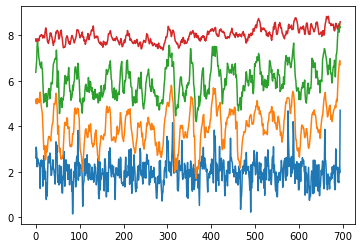

In [31]:
plt.plot(apsl_gcm_02_WPAC/100+2)
plt.plot(atas_gcm_02_CPAC+4)
plt.plot(atas_gcm_02_EPAC+6)
plt.plot(atas_gcm_02_ATL+8)

# read GCM HadGEM_AO


In [32]:
gcm_name='HadGEM_AO'
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/HadGEM2_AO/'
            # /media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/HadGEM2_AO/
            #              psl_day_HadGEM2-AO_historical_r1i1p1_18600101-20051230-012.nc
filename = path_gcm  + '/psl_day_HadGEM2-AO_historical_r1i1p1_18600101-20051230-012.nc'
#splitting into training and testing section

fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

# cropping years before 1901
st_gcm=1860
dt_st=1948
index_of_st=(dt_st- st_gcm) *360

psl_gcm_daily=fh.variables['psl'][index_of_st:,:,:].data
print(psl_gcm_daily.shape[0],"==",360*58)

N1,N2=psl_gcm_daily.shape[1],psl_gcm_daily.shape[2]

psl_gcm_daily=psl_gcm_daily.reshape([30,12,58,N1,N2],order='F')
print(psl_gcm_daily.shape)

psl_gcm_daily=np.mean(psl_gcm_daily,axis=0)
print(psl_gcm_daily.shape)

psl_gcm_monthly=psl_gcm_daily.reshape([12*58,N1,N2],order='F')
print(psl_gcm_monthly.shape)



20880 == 20880
(30, 12, 58, 145, 192)
(12, 58, 145, 192)
(696, 145, 192)


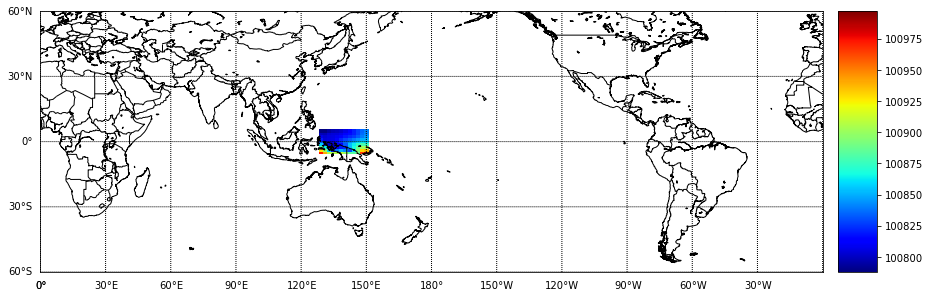

In [33]:
# cropping the study area out WPAC
data_bounds=data_bounds_wpac

l_lat,u_lat,lat_gcm_WPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_WPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
psl_gcm_WPAC=psl_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(psl_gcm_WPAC[200,:,:],lat_gcm_WPAC,lon_gcm_WPAC,map_bounds,mp_spacing=30)


In [34]:
gcm_name='HadGEM_AO'
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/HadGEM2_AO/'

filename = path_gcm + '/tas_day_HadGEM2-AO_historical_r1i1p1_18600101-20051230.nc'
#splitting into training and testing section

fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

# cropping years before 1901
st_gcm=1860
dt_st=1948
index_of_st=(dt_st- st_gcm) *360

tas_gcm_daily=fh.variables['tas'][index_of_st:,:,:].data
print(tas_gcm_daily.shape[0],"==",360*58)

N1,N2=tas_gcm_daily.shape[1],tas_gcm_daily.shape[2]

tas_gcm_daily=tas_gcm_daily.reshape([30,12,58,N1,N2],order='F')
print(tas_gcm_daily.shape)

tas_gcm_daily=np.mean(tas_gcm_daily,axis=0)
print(tas_gcm_daily.shape)

tas_gcm_monthly=tas_gcm_daily.reshape([12*58,N1,N2],order='F')
print(tas_gcm_monthly.shape)



20880 == 20880
(30, 12, 58, 145, 192)
(12, 58, 145, 192)
(696, 145, 192)


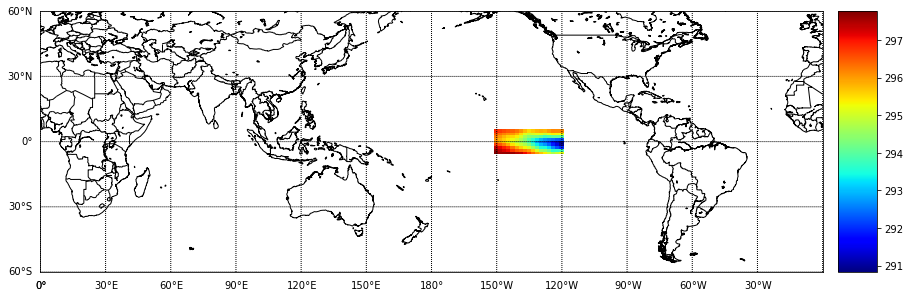

In [35]:
data_bounds=data_bounds_cpac
l_lat,u_lat,lat_gcm_CPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_CPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_CPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_CPAC[200,:,:],lat_gcm_CPAC,lon_gcm_CPAC,map_bounds,mp_spacing=30)


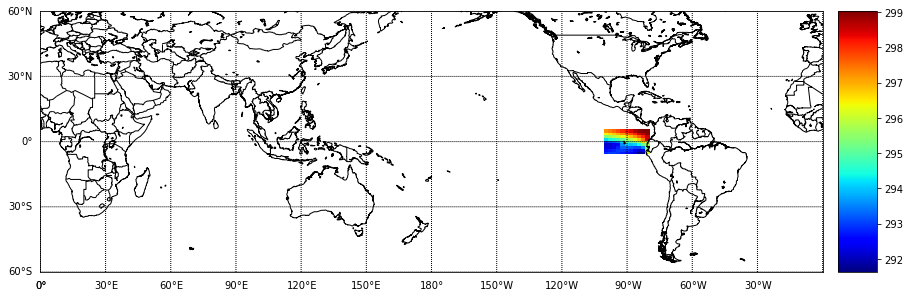

In [36]:
data_bounds=data_bounds_epac
l_lat,u_lat,lat_gcm_EPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_EPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_EPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_EPAC[200,:,:],lat_gcm_EPAC,lon_gcm_EPAC,map_bounds,mp_spacing=30)


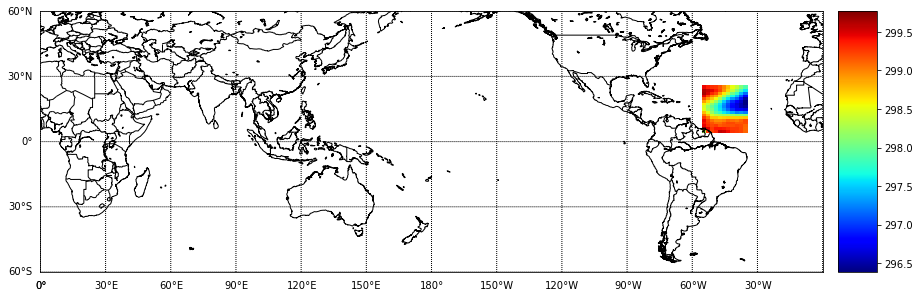

In [37]:
data_bounds=data_bounds_atl
l_lat,u_lat,lat_gcm_ATL=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_ATL=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_ATL=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_ATL[200,:,:],lat_gcm_ATL,lon_gcm_ATL,map_bounds,mp_spacing=30)


In [38]:

psl_gcm_03_WPAC=np.mean(psl_gcm_WPAC,axis=(1,2))
tas_gcm_03_CPAC=np.mean(tas_gcm_CPAC,axis=(1,2))
tas_gcm_03_EPAC=np.mean(tas_gcm_EPAC,axis=(1,2))
tas_gcm_03_ATL=np.mean(tas_gcm_ATL,axis=(1,2))

#

In [39]:
apsl_gcm_03_WPAC=anom_mon(psl_gcm_03_WPAC)
atas_gcm_03_CPAC=anom_mon(tas_gcm_03_CPAC)
atas_gcm_03_EPAC=anom_mon(tas_gcm_03_EPAC)
atas_gcm_03_ATL=anom_mon(tas_gcm_03_ATL)

(696,)
[100771.484 100888.695 100949.66  100968.87  100927.3   100915.266
 100885.164 100886.22  100910.75  100940.695 100883.95  100780.34 ]
(696,)
[298.51028 298.39365 297.87015 298.07498 298.9283  299.03223 298.74963
 297.9938  297.51593 297.67612 297.9644  298.34885]
(696,)
[298.69244 298.8876  298.82468 299.28802 298.95203 297.68854 297.04196
 296.77597 296.77957 296.9006  297.3733  298.02014]
(696,)
[296.4763  296.02063 295.9045  296.03162 296.45242 297.16806 297.67545
 298.17447 298.5341  298.68176 298.20465 297.2753 ]


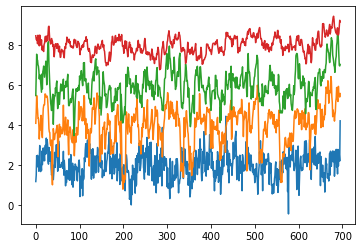

In [40]:
plt.plot(apsl_gcm_03_WPAC/100+2)
plt.plot(atas_gcm_03_CPAC+4)
plt.plot(atas_gcm_03_EPAC+6)
plt.plot(atas_gcm_03_ATL+8)

# read GFDL_CM3


In [41]:
gcm_name='GFDL_CM3'
st_gcm=1945
print((st-st_gcm)*365)
def get_fname(var,str1,str2):
  url='/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/'+var+'_day_GFDL-CM3_historical_r1i1p1_'+str1+'-'+str2+'.nc'
  return url

delta=5
def get_urls(var):
  fname_list=[]
  for yeaR in range(st_gcm,2004,delta):
    str1=str(yeaR)+'0101'
    str2=str(yeaR+delta-1)+'1231'
    
    fname_list.append(get_fname(var,str1,str2))

  str1=str(2005)+'0101'
  str2=str(2005)+'1231'
  
  fname_list.append(get_fname(var,str1,str2))
  return fname_list


fnames_tas=get_urls('tas')
fnames_psl=get_urls('psl')

1095


In [42]:
fnames_psl

['/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19450101-19491231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19500101-19541231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19550101-19591231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19600101-19641231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19650101-19691231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19700101-19741231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19750101-19791231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1p1_19800101-19841231.nc',
 '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/GFDL_CM3/psl_day_GFDL-CM3_historical_r1i1

Monthly data dimensions: (696, 90, 144)


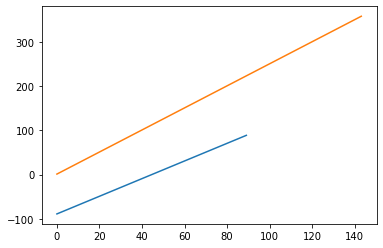

In [43]:
# reading file(s)
filename = fnames_psl[0]
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)

for i in range(len(fnames_psl)):
  filename = fnames_psl[i]
  fh = Dataset(filename, mode='r')
  lons = fh.variables['lon'][:]
  lats = fh.variables['lat'][:]
  #print(fh)
  data = fh.variables['psl'][:].data 

  if i==0:
    # starts at 1948
    data_gcm_daily=data[(st-st_gcm)*365:,:,:]
  else:
    data_gcm_daily=np.concatenate((data_gcm_daily,data),axis=0)

data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]
psl_gcm_monthly=uu.daily_to_monthly_sts(data_gcm_daily,st,en,method='MEAN')


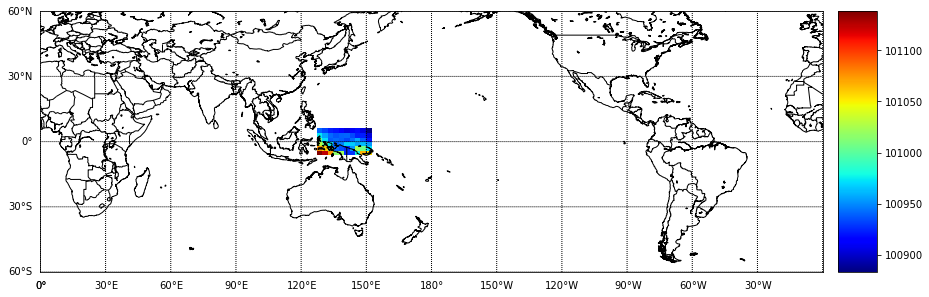

In [44]:
# cropping the study area out WPAC
data_bounds=data_bounds_wpac
l_lat,u_lat,lat_gcm_WPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_WPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
psl_gcm_WPAC=psl_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(psl_gcm_WPAC[200,:,:],lat_gcm_WPAC,lon_gcm_WPAC,map_bounds,mp_spacing=30)


Monthly data dimensions: (696, 90, 144)


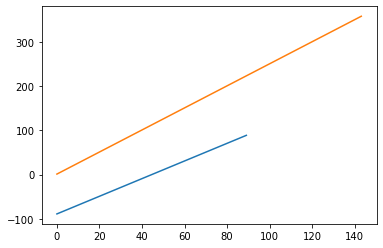

In [45]:
# reading file(s)
filename = fnames_tas[0]
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)

for i in range(len(fnames_tas)):
  filename = fnames_tas[i]
  fh = Dataset(filename, mode='r')
  lons = fh.variables['lon'][:]
  lats = fh.variables['lat'][:]
  #print(fh)
  data = fh.variables['tas'][:].data 

  if i==0:
    # starts at 1948
    data_gcm_daily=data[(st-st_gcm)*365:,:,:]
  else:
    data_gcm_daily=np.concatenate((data_gcm_daily,data),axis=0)

data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]
tas_gcm_monthly=uu.daily_to_monthly_sts(data_gcm_daily,st,en,method='MEAN')


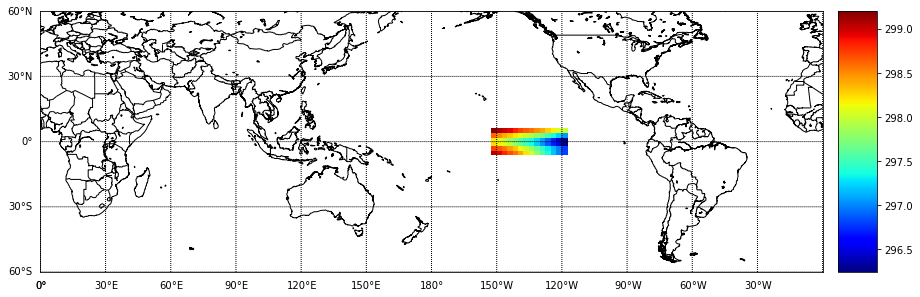

In [46]:
data_bounds=data_bounds_cpac
l_lat,u_lat,lat_gcm_CPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_CPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_CPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_CPAC[200,:,:],lat_gcm_CPAC,lon_gcm_CPAC,map_bounds,mp_spacing=30)


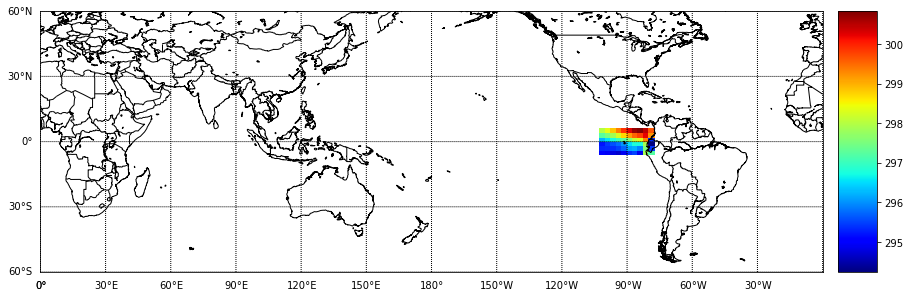

In [47]:
data_bounds=data_bounds_epac
l_lat,u_lat,lat_gcm_EPAC=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_EPAC=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_EPAC=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_EPAC[200,:,:],lat_gcm_EPAC,lon_gcm_EPAC,map_bounds,mp_spacing=30)


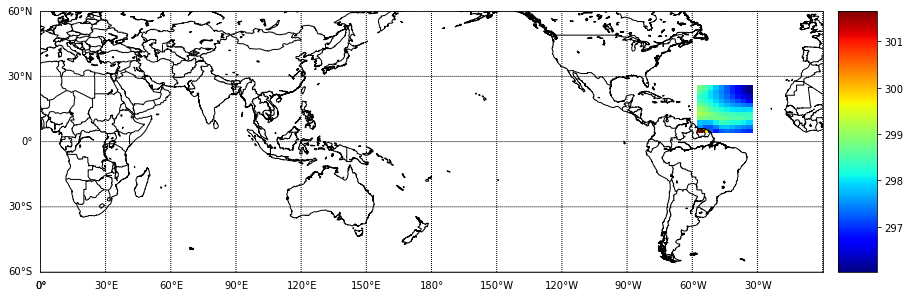

In [48]:
data_bounds=data_bounds_atl
l_lat,u_lat,lat_gcm_ATL=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm_ATL=uu.find_bounds(lons,data_bounds[0],data_bounds[2])
tas_gcm_ATL=tas_gcm_monthly[:,l_lat:u_lat+1,l_lon:u_lon+1]

map_bounds=[0 ,60,360,-60]#[50 , 50, 110, 0] #ltrb
mp_spacing=10
uu.map_plot_cyl(tas_gcm_ATL[200,:,:],lat_gcm_ATL,lon_gcm_ATL,map_bounds,mp_spacing=30)


In [49]:

psl_gcm_04_WPAC=np.mean(psl_gcm_WPAC,axis=(1,2))
tas_gcm_04_CPAC=np.mean(tas_gcm_CPAC,axis=(1,2))
tas_gcm_04_EPAC=np.mean(tas_gcm_EPAC,axis=(1,2))
tas_gcm_04_ATL=np.mean(tas_gcm_ATL,axis=(1,2))

#

In [50]:
apsl_gcm_04_WPAC=anom_mon(psl_gcm_04_WPAC)
atas_gcm_04_CPAC=anom_mon(tas_gcm_04_CPAC)
atas_gcm_04_EPAC=anom_mon(tas_gcm_04_EPAC)
atas_gcm_04_ATL=anom_mon(tas_gcm_04_ATL)

(696,)
[100681.00328982 100801.54909162 100826.9725923  100820.4665604
 100830.1290773  100849.08225223 100899.23994043 100900.57711983
 100899.55417572 100878.265484   100796.06767945 100707.92384637]
(696,)
[298.37819785 297.94846877 297.64182001 297.70530732 298.0457077
 298.02171501 297.62576252 297.37195844 297.27036728 297.35943561
 297.72814795 298.20470686]
(696,)
[297.47095135 297.46590764 297.61038182 297.86270986 297.6205507
 295.85005567 295.15350445 295.49502837 296.19000012 296.66713278
 297.04191228 297.39462533]
(696,)
[295.25395259 294.79763429 294.71837933 295.03638594 295.63291818
 296.44923999 297.49100349 298.13876766 298.40504817 298.26202005
 297.47068762 296.20536146]


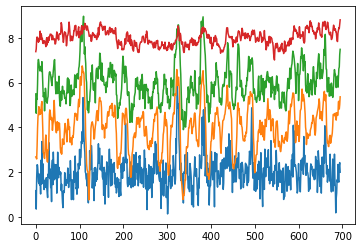

In [51]:
plt.plot(apsl_gcm_04_WPAC/100+2)
plt.plot(atas_gcm_04_CPAC+4)
plt.plot(atas_gcm_04_EPAC+6)
plt.plot(atas_gcm_04_ATL+8)

# BC

In [57]:
import scipy
from scipy.stats import gamma


def bias_corr_historical_normal(data_grid_obs,data_grid_hist):
  var_data_obs = data_grid_obs
  var_data_hist = data_grid_hist
 
  var_data_obs[np.isnan(var_data_obs)]=np.nanmean(var_data_obs)
  var_data_hist[np.isnan(var_data_hist)]=np.nanmean(var_data_hist)

  bias_corr=np.zeros(var_data_hist.shape[0]);

  mu,sig = scipy.stats.norm.fit(var_data_hist)
  
  cdf = scipy.stats.norm.cdf(data_grid_hist,loc=mu,scale=sig)

  omu,osig = scipy.stats.norm.fit(var_data_obs)

  bias_corr=scipy.stats.norm.ppf(cdf,loc=omu,scale=osig)

  return bias_corr


def bias_corr_historical_with_non_param(data_grid_obs,data_grid_hist_train):

    var_data_obs = data_grid_obs
    var_data_hist_train = data_grid_hist_train
    var_data_hist_pred = data_grid_hist_train

    # var_data_obs[var_data_obs<0]=0
    # var_data_hist_train[var_data_hist_train<0]=0
    # var_data_hist_pred[var_data_hist_pred<0]=0

    var_data_obs[np.isnan(var_data_obs)]=0
    var_data_hist_train[np.isnan(var_data_hist_train)]=0
    var_data_hist_pred[np.isnan(var_data_hist_pred)]=0

    var_data_obs[np.isinf(var_data_obs)]=0
    var_data_hist_train[np.isinf(var_data_hist_train)]=0
    var_data_hist_pred[np.isinf(var_data_hist_pred)]=0


    hist = np.histogram(var_data_hist_train, bins=20)
    hist_dist = scipy.stats.rv_histogram(hist)

    cdf = hist_dist.cdf(var_data_hist_pred)
    
    histo = np.histogram(var_data_obs, bins=20)
    hist_disto = scipy.stats.rv_histogram(histo)

    bias_corr=hist_disto.ppf(cdf)

    return bias_corr



In [63]:
bc_gcm_01_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_gcm_01_WPAC)
bc_gcm_01_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_gcm_01_CPAC)
bc_gcm_01_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_gcm_01_EPAC)
bc_gcm_01_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_gcm_01_ATL)

bc_gcm_02_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_gcm_02_WPAC)
bc_gcm_02_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_gcm_02_CPAC)
bc_gcm_02_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_gcm_02_EPAC)
bc_gcm_02_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_gcm_02_ATL)

bc_gcm_03_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_gcm_03_WPAC)
bc_gcm_03_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_gcm_03_CPAC)
bc_gcm_03_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_gcm_03_EPAC)
bc_gcm_03_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_gcm_03_ATL)

bc_gcm_04_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_gcm_04_WPAC)
bc_gcm_04_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_gcm_04_CPAC)
bc_gcm_04_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_gcm_04_EPAC)
bc_gcm_04_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_gcm_04_ATL)



In [64]:
bc_eqm__gcm_01_WPAC=bias_corr_historical_with_non_param(psl_ncar_WPAC,psl_gcm_01_WPAC)
bc_eqm__gcm_01_CPAC=bias_corr_historical_with_non_param(tas_ncar_CPAC,tas_gcm_01_CPAC)
bc_eqm__gcm_01_EPAC=bias_corr_historical_with_non_param(tas_ncar_EPAC,tas_gcm_01_EPAC)
bc_eqm__gcm_01_ATL=bias_corr_historical_with_non_param(tas_ncar_ATL,tas_gcm_01_ATL)

bc_eqm__gcm_02_WPAC=bias_corr_historical_with_non_param(psl_ncar_WPAC,psl_gcm_02_WPAC)
bc_eqm__gcm_02_CPAC=bias_corr_historical_with_non_param(tas_ncar_CPAC,tas_gcm_02_CPAC)
bc_eqm__gcm_02_EPAC=bias_corr_historical_with_non_param(tas_ncar_EPAC,tas_gcm_02_EPAC)
bc_eqm__gcm_02_ATL=bias_corr_historical_with_non_param(tas_ncar_ATL,tas_gcm_02_ATL)

bc_eqm__gcm_03_WPAC=bias_corr_historical_with_non_param(psl_ncar_WPAC,psl_gcm_03_WPAC)
bc_eqm__gcm_03_CPAC=bias_corr_historical_with_non_param(tas_ncar_CPAC,tas_gcm_03_CPAC)
bc_eqm__gcm_03_EPAC=bias_corr_historical_with_non_param(tas_ncar_EPAC,tas_gcm_03_EPAC)
bc_eqm__gcm_03_ATL=bias_corr_historical_with_non_param(tas_ncar_ATL,tas_gcm_03_ATL)

bc_eqm__gcm_04_WPAC=bias_corr_historical_with_non_param(psl_ncar_WPAC,psl_gcm_04_WPAC)
bc_eqm__gcm_04_CPAC=bias_corr_historical_with_non_param(tas_ncar_CPAC,tas_gcm_04_CPAC)
bc_eqm__gcm_04_EPAC=bias_corr_historical_with_non_param(tas_ncar_EPAC,tas_gcm_04_EPAC)
bc_eqm__gcm_04_ATL=bias_corr_historical_with_non_param(tas_ncar_ATL,tas_gcm_04_ATL)


In [65]:
data_obcgcm_02=np.concatenate((bc_gcm_02_WPAC[:,np.newaxis]/1000,bc_gcm_02_CPAC[:,np.newaxis],bc_gcm_02_EPAC[:,np.newaxis],bc_gcm_02_ATL[:,np.newaxis]),axis=1)


In [66]:
data_oncar=np.concatenate((psl_ncar_WPAC[:,np.newaxis]/1000,tas_ncar_CPAC[:,np.newaxis],tas_ncar_EPAC[:,np.newaxis],tas_ncar_ATL[:,np.newaxis]),axis=1)
data_ogcm_01=np.concatenate((psl_gcm_01_WPAC[:,np.newaxis]/1000,tas_gcm_01_CPAC[:,np.newaxis],tas_gcm_01_EPAC[:,np.newaxis],tas_gcm_01_ATL[:,np.newaxis]),axis=1)
data_ogcm_02=np.concatenate((psl_gcm_02_WPAC[:,np.newaxis]/1000,tas_gcm_02_CPAC[:,np.newaxis],tas_gcm_02_EPAC[:,np.newaxis],tas_gcm_02_ATL[:,np.newaxis]),axis=1)
data_ogcm_03=np.concatenate((psl_gcm_03_WPAC[:,np.newaxis]/1000,tas_gcm_03_CPAC[:,np.newaxis],tas_gcm_03_EPAC[:,np.newaxis],tas_gcm_03_ATL[:,np.newaxis]),axis=1)
data_ogcm_04=np.concatenate((psl_gcm_04_WPAC[:,np.newaxis]/1000,tas_gcm_04_CPAC[:,np.newaxis],tas_gcm_04_EPAC[:,np.newaxis],tas_gcm_04_ATL[:,np.newaxis]),axis=1)


In [75]:
path_out = '/home/vikram/BCSD_data/PCMCI_Walker/'
np.savetxt(path_out + '/data_oncar.csv',data_oncar, delimiter  = ',')
np.savetxt(path_out + '/data_ogcm_01.csv',data_ogcm_01, delimiter  = ',')
np.savetxt(path_out + '/data_ogcm_02.csv',data_ogcm_02, delimiter  = ',')
np.savetxt(path_out + '/data_ogcm_03.csv',data_ogcm_03, delimiter  = ',')
np.savetxt(path_out + '/data_ogcm_04.csv',data_ogcm_04, delimiter  = ',')


In [18]:
import pandas as pd
data_mbc_gcm_01=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCn_01.csv', sep=',',header=None).values
data_mbc_gcm_02=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCn_02.csv', sep=',',header=None).values
data_mbc_gcm_03=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCn_03.csv', sep=',',header=None).values
data_mbc_gcm_04=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCn_04.csv', sep=',',header=None).values

data_mbcp_gcm_01=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCp_01.csv', sep=',',header=None).values
data_mbcp_gcm_02=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCp_02.csv', sep=',',header=None).values
data_mbcp_gcm_03=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCp_03.csv', sep=',',header=None).values
data_mbcp_gcm_04=pd.read_csv('/home/vikram/Dropbox/BCSD Work/MBC/data_walker' + '/data_MBCp_04.csv', sep=',',header=None).values


In [19]:
adata_mbc_gcm_01=np.concatenate((anom_mon(data_mbc_gcm_01[:,0])[:,np.newaxis],anom_mon(data_mbc_gcm_01[:,1])[:,np.newaxis],anom_mon(data_mbc_gcm_01[:,2])[:,np.newaxis],anom_mon(data_mbc_gcm_01[:,3])[:,np.newaxis]),axis=1)
adata_mbc_gcm_02=np.concatenate((anom_mon(data_mbc_gcm_02[:,0])[:,np.newaxis],anom_mon(data_mbc_gcm_02[:,1])[:,np.newaxis],anom_mon(data_mbc_gcm_02[:,2])[:,np.newaxis],anom_mon(data_mbc_gcm_02[:,3])[:,np.newaxis]),axis=1)
adata_mbc_gcm_03=np.concatenate((anom_mon(data_mbc_gcm_03[:,0])[:,np.newaxis],anom_mon(data_mbc_gcm_03[:,1])[:,np.newaxis],anom_mon(data_mbc_gcm_03[:,2])[:,np.newaxis],anom_mon(data_mbc_gcm_03[:,3])[:,np.newaxis]),axis=1)
adata_mbc_gcm_04=np.concatenate((anom_mon(data_mbc_gcm_04[:,0])[:,np.newaxis],anom_mon(data_mbc_gcm_04[:,1])[:,np.newaxis],anom_mon(data_mbc_gcm_04[:,2])[:,np.newaxis],anom_mon(data_mbc_gcm_04[:,3])[:,np.newaxis]),axis=1)

adata_mbcp_gcm_01=np.concatenate((anom_mon(data_mbcp_gcm_01[:,0])[:,np.newaxis],anom_mon(data_mbcp_gcm_01[:,1])[:,np.newaxis],anom_mon(data_mbcp_gcm_01[:,2])[:,np.newaxis],anom_mon(data_mbcp_gcm_01[:,3])[:,np.newaxis]),axis=1)
adata_mbcp_gcm_02=np.concatenate((anom_mon(data_mbcp_gcm_02[:,0])[:,np.newaxis],anom_mon(data_mbcp_gcm_02[:,1])[:,np.newaxis],anom_mon(data_mbcp_gcm_02[:,2])[:,np.newaxis],anom_mon(data_mbcp_gcm_02[:,3])[:,np.newaxis]),axis=1)
adata_mbcp_gcm_03=np.concatenate((anom_mon(data_mbcp_gcm_03[:,0])[:,np.newaxis],anom_mon(data_mbcp_gcm_03[:,1])[:,np.newaxis],anom_mon(data_mbcp_gcm_03[:,2])[:,np.newaxis],anom_mon(data_mbcp_gcm_03[:,3])[:,np.newaxis]),axis=1)
adata_mbcp_gcm_04=np.concatenate((anom_mon(data_mbcp_gcm_04[:,0])[:,np.newaxis],anom_mon(data_mbcp_gcm_04[:,1])[:,np.newaxis],anom_mon(data_mbcp_gcm_04[:,2])[:,np.newaxis],anom_mon(data_mbcp_gcm_04[:,3])[:,np.newaxis]),axis=1)



(696,)
[99.69241312 99.72432179 99.80561072 99.8786549  99.87075862 99.85769168
 99.82844329 99.86755523 99.81178704 99.7695493  99.76700727 99.70847454]
(696,)
[298.02031839 298.36061044 298.87986124 299.26882356 299.34259559
 298.99613163 298.62982073 298.22674613 297.83529768 297.69772444
 297.7403575  297.84688752]
(696,)
[297.5665299  298.18181426 298.62964656 298.89757354 298.31136664
 297.10132888 296.5500462  295.77651294 295.3940577  295.4831322
 295.80244077 296.52502757]
(696,)
[296.70831246 296.47828937 296.70661032 297.22358335 297.76144883
 298.25272922 298.64862797 299.18834818 299.25962777 298.94727931
 298.36238466 297.45969259]
(696,)
[99.73252303 99.78757058 99.83805698 99.87870097 99.87398613 99.85465962
 99.81257422 99.83936867 99.83840585 99.75025876 99.70558324 99.67057947]
(696,)
[298.29663454 298.46310372 298.89330371 299.0821107  298.8191723
 298.45887651 298.10898932 298.00096393 298.11438935 298.17587543
 298.17474576 298.25700957]
(696,)
[297.72257101 298.4

In [78]:
abc_gcm_01_WPAC=anom_mon(bc_gcm_01_WPAC)
abc_gcm_01_CPAC=anom_mon(bc_gcm_01_CPAC)
abc_gcm_01_EPAC=anom_mon(bc_gcm_01_EPAC)
abc_gcm_01_ATL=anom_mon(bc_gcm_01_ATL)

abc_gcm_02_WPAC=anom_mon(bc_gcm_02_WPAC)
abc_gcm_02_CPAC=anom_mon(bc_gcm_02_CPAC)
abc_gcm_02_EPAC=anom_mon(bc_gcm_02_EPAC)
abc_gcm_02_ATL=anom_mon(bc_gcm_02_ATL)

abc_gcm_03_WPAC=anom_mon(bc_gcm_03_WPAC)
abc_gcm_03_CPAC=anom_mon(bc_gcm_03_CPAC)
abc_gcm_03_EPAC=anom_mon(bc_gcm_03_EPAC)
abc_gcm_03_ATL=anom_mon(bc_gcm_03_ATL)

abc_gcm_04_WPAC=anom_mon(bc_gcm_04_WPAC)
abc_gcm_04_CPAC=anom_mon(bc_gcm_04_CPAC)
abc_gcm_04_EPAC=anom_mon(bc_gcm_04_EPAC)
abc_gcm_04_ATL=anom_mon(bc_gcm_04_ATL)

(696,)
[99696.84139988 99740.05591202 99842.91713129 99917.35258224
 99906.80133492 99873.00264794 99809.09826168 99824.70332516
 99773.72771572 99745.21952015 99754.09250612 99698.45517366]
(696,)
[298.27575048 298.72684708 299.10681392 299.38008849 299.42887386
 299.04772129 298.41010144 297.8517131  297.57963639 297.55094203
 297.65362046 297.83306631]
(696,)
[296.97267515 297.66080802 298.41891178 298.94258828 298.55316963
 297.50599191 296.80928935 296.02155246 295.54299972 295.61899264
 295.86335962 296.30913861]
(696,)
[296.74684722 296.48856985 296.67162836 297.1333998  297.55251616
 298.09219702 298.67090311 299.13479735 299.32880606 299.15020372
 298.48972743 297.53733796]
(696,)
[99734.56884258 99811.51199021 99850.20755001 99890.39965738
 99885.30580251 99860.02279458 99821.21047047 99831.62590149
 99835.52102417 99747.26357257 99665.90499501 99648.72490979]
(696,)
[298.4111496  298.5208419  298.89216644 299.11678816 298.81768596
 298.41142632 297.99062067 297.8423833  297.

In [79]:
abc_eqm__gcm_01_WPAC=anom_mon(bc_eqm__gcm_01_WPAC)
abc_eqm__gcm_01_CPAC=anom_mon(bc_eqm__gcm_01_CPAC)
abc_eqm__gcm_01_EPAC=anom_mon(bc_eqm__gcm_01_EPAC)
abc_eqm__gcm_01_ATL=anom_mon(bc_eqm__gcm_01_ATL)

abc_eqm__gcm_02_WPAC=anom_mon(bc_eqm__gcm_02_WPAC)
abc_eqm__gcm_02_CPAC=anom_mon(bc_eqm__gcm_02_CPAC)
abc_eqm__gcm_02_EPAC=anom_mon(bc_eqm__gcm_02_EPAC)
abc_eqm__gcm_02_ATL=anom_mon(bc_eqm__gcm_02_ATL)

abc_eqm__gcm_03_WPAC=anom_mon(bc_eqm__gcm_03_WPAC)
abc_eqm__gcm_03_CPAC=anom_mon(bc_eqm__gcm_03_CPAC)
abc_eqm__gcm_03_EPAC=anom_mon(bc_eqm__gcm_03_EPAC)
abc_eqm__gcm_03_ATL=anom_mon(bc_eqm__gcm_03_ATL)

abc_eqm__gcm_04_WPAC=anom_mon(bc_eqm__gcm_04_WPAC)
abc_eqm__gcm_04_CPAC=anom_mon(bc_eqm__gcm_04_CPAC)
abc_eqm__gcm_04_EPAC=anom_mon(bc_eqm__gcm_04_EPAC)
abc_eqm__gcm_04_ATL=anom_mon(bc_eqm__gcm_04_ATL)



(696,)
[99697.75645212 99742.29748878 99842.26544182 99913.94722546
 99904.70091505 99868.365204   99809.84045967 99823.19999405
 99778.19076265 99748.14080451 99755.71045812 99700.61259295]
(696,)
[298.32701759 298.68358002 299.03811195 299.36231347 299.42236783
 298.95092804 298.44662513 297.95063876 297.59841481 297.55216383
 297.69180516 297.89571088]
(696,)
[296.9710004  297.72659723 298.4441597  298.92487767 298.5558247
 297.54157789 296.80224292 295.96474919 295.55251462 295.61519766
 295.81048796 296.23282568]
(696,)
[296.73909351 296.45422826 296.65190765 297.15319647 297.57711582
 298.09183136 298.64392577 299.10509174 299.32367819 299.11897997
 298.47189396 297.56316548]
(696,)
[99739.50628923 99809.25934137 99847.19587814 99902.36402389
 99890.98576699 99853.15201006 99808.38334089 99819.74376532
 99824.99022147 99744.10971569 99680.8715585  99662.1339083 ]
(696,)
[298.40673698 298.51293375 298.88988076 299.1224336  298.80207787
 298.39276716 297.99943944 297.85788685 297.9

In [80]:
psl_rnd_01_WPAC=np.random.random((psl_gcm_01_WPAC.shape))
tas_rnd_01_CPAC=np.random.random((psl_gcm_01_WPAC.shape))
tas_rnd_01_EPAC=np.random.random((psl_gcm_01_WPAC.shape))
tas_rnd_01_ATL=np.random.random((psl_gcm_01_WPAC.shape))

bc_rnd_01_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_rnd_01_WPAC)
bc_rnd_01_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_rnd_01_CPAC)
bc_rnd_01_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_rnd_01_EPAC)
bc_rnd_01_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_rnd_01_ATL)

abc_rnd_01_WPAC=anom_mon(bc_rnd_01_WPAC)
abc_rnd_01_CPAC=anom_mon(bc_rnd_01_CPAC)
abc_rnd_01_EPAC=anom_mon(bc_rnd_01_EPAC)
abc_rnd_01_ATL=anom_mon(bc_rnd_01_ATL)

psl_rnd_02_WPAC=np.random.random((psl_gcm_02_WPAC.shape))
tas_rnd_02_CPAC=np.random.random((psl_gcm_02_WPAC.shape))
tas_rnd_02_EPAC=np.random.random((psl_gcm_02_WPAC.shape))
tas_rnd_02_ATL=np.random.random((psl_gcm_02_WPAC.shape))

bc_rnd_02_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_rnd_02_WPAC)
bc_rnd_02_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_rnd_02_CPAC)
bc_rnd_02_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_rnd_02_EPAC)
bc_rnd_02_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_rnd_02_ATL)

abc_rnd_02_WPAC=anom_mon(bc_rnd_02_WPAC)
abc_rnd_02_CPAC=anom_mon(bc_rnd_02_CPAC)
abc_rnd_02_EPAC=anom_mon(bc_rnd_02_EPAC)
abc_rnd_02_ATL=anom_mon(bc_rnd_02_ATL)


psl_rnd_03_WPAC=np.random.random((psl_gcm_03_WPAC.shape))
tas_rnd_03_CPAC=np.random.random((psl_gcm_03_WPAC.shape))
tas_rnd_03_EPAC=np.random.random((psl_gcm_03_WPAC.shape))
tas_rnd_03_ATL=np.random.random((psl_gcm_03_WPAC.shape))

bc_rnd_03_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_rnd_03_WPAC)
bc_rnd_03_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_rnd_03_CPAC)
bc_rnd_03_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_rnd_03_EPAC)
bc_rnd_03_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_rnd_03_ATL)

abc_rnd_03_WPAC=anom_mon(bc_rnd_03_WPAC)
abc_rnd_03_CPAC=anom_mon(bc_rnd_03_CPAC)
abc_rnd_03_EPAC=anom_mon(bc_rnd_03_EPAC)
abc_rnd_03_ATL=anom_mon(bc_rnd_03_ATL)


psl_rnd_04_WPAC=np.random.random((psl_gcm_04_WPAC.shape))
tas_rnd_04_CPAC=np.random.random((psl_gcm_04_WPAC.shape))
tas_rnd_04_EPAC=np.random.random((psl_gcm_04_WPAC.shape))
tas_rnd_04_ATL=np.random.random((psl_gcm_04_WPAC.shape))

bc_rnd_04_WPAC=bias_corr_historical_normal(psl_ncar_WPAC,psl_rnd_04_WPAC)
bc_rnd_04_CPAC=bias_corr_historical_normal(tas_ncar_CPAC,tas_rnd_04_CPAC)
bc_rnd_04_EPAC=bias_corr_historical_normal(tas_ncar_EPAC,tas_rnd_04_EPAC)
bc_rnd_04_ATL=bias_corr_historical_normal(tas_ncar_ATL,tas_rnd_04_ATL)

abc_rnd_04_WPAC=anom_mon(bc_rnd_04_WPAC)
abc_rnd_04_CPAC=anom_mon(bc_rnd_04_CPAC)
abc_rnd_04_EPAC=anom_mon(bc_rnd_04_EPAC)
abc_rnd_04_ATL=anom_mon(bc_rnd_04_ATL)

(696,)
[99776.64872274 99797.28131679 99791.61445846 99794.8272386
 99792.98150658 99810.34622151 99795.07603471 99816.18273534
 99804.27494749 99802.89009537 99804.38020379 99795.7640294 ]
(696,)
[298.4811915  298.36188006 298.40208833 298.43341741 298.36572065
 298.38952694 298.49233531 298.42533081 298.33914106 298.41254757
 298.33012764 298.41186757]
(696,)
[296.84230133 296.68414528 296.98774728 297.2424445  297.0382563
 297.20750029 296.82278154 297.22439022 297.33443065 297.11291593
 296.97347293 296.74909092]
(696,)
[297.97269396 297.63377883 297.98666022 297.91365125 297.94613117
 298.00139194 297.83569753 298.05113088 297.86960166 297.82878189
 297.93600671 298.021408  ]
(696,)
[99801.4213788  99806.51084514 99789.97217191 99772.23298563
 99805.71750814 99793.67292526 99798.70580003 99793.15635982
 99805.4724151  99805.24119275 99827.95346792 99782.21046028]
(696,)
[298.54221547 298.43536252 298.23450629 298.34581656 298.37213583
 298.33653454 298.29438489 298.51298098 298.51

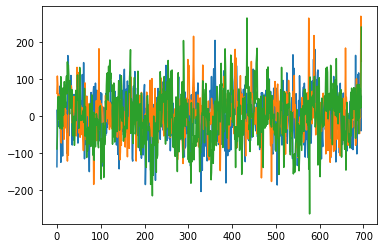

In [81]:
plt.plot(abc_gcm_01_WPAC)
plt.plot(abc_gcm_02_WPAC)
plt.plot(abc_gcm_03_WPAC)


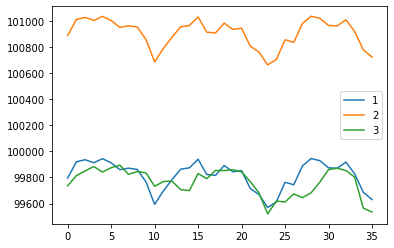

In [82]:
plt.plot(bc_gcm_02_WPAC[:12*3])
plt.plot(psl_gcm_02_WPAC[:12*3])
plt.plot(psl_ncar_WPAC[:12*3])
plt.legend([1,2,3])

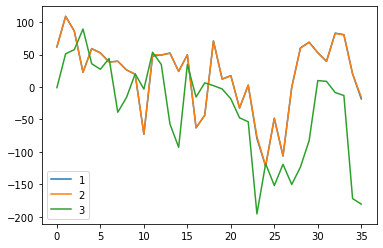

In [83]:
plt.plot(abc_gcm_02_WPAC[:12*3])
plt.plot(apsl_gcm_02_WPAC[:12*3])
plt.plot(apsl_ncar_WPAC[:12*3])
plt.legend([1,2,3])

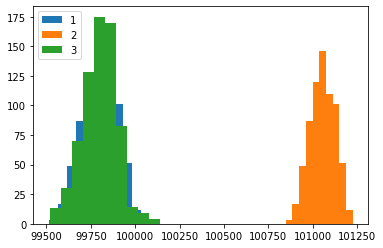

In [84]:
plt.hist(bc_gcm_01_WPAC)
plt.hist(psl_gcm_01_WPAC)
plt.hist(psl_ncar_WPAC)

plt.legend([1,2,3])

# Tigramite

In [91]:
# !pip install tigramite==4.2.1.3

     |████████████████████████████████| 231 kB 7.9 MB/s eta 0:00:01
  Created wheel for tigramite: filename=tigramite-4.2.1.3-cp39-cp39-linux_x86_64.whl size=213075 sha256=fccc6e3331f1ceb13191ccefdae20f5ec67656cb44f749002cd052f763ba24dd
  Stored in directory: /home/vikram/.cache/pip/wheels/df/b0/fc/07c0a11779d13d9a55d39f9c812f75feba7589b6162a81784f
Successfully built tigramite


In [ ]:

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

In [ ]:
# data_ncar=np.concatenate((apsl_ncar_WPAC[:,np.newaxis]/100,adata_ncar_CPAC[:,np.newaxis],adata_ncar_EPAC[:,np.newaxis],adata_ncar_ATL[:,np.newaxis]),axis=1)
# data_gcm_01=np.concatenate((apsl_gcm_01_WPAC[:,np.newaxis],atas_gcm_01_CPAC[:,np.newaxis],atas_gcm_01_EPAC[:,np.newaxis],atas_gcm_01_ATL[:,np.newaxis]),axis=1)
# data_gcm_02=np.concatenate((apsl_gcm_02_WPAC[:,np.newaxis],atas_gcm_02_CPAC[:,np.newaxis],atas_gcm_02_EPAC[:,np.newaxis],atas_gcm_02_ATL[:,np.newaxis]),axis=1)
# data_gcm_03=np.concatenate((apsl_gcm_03_WPAC[:,np.newaxis],atas_gcm_03_CPAC[:,np.newaxis],atas_gcm_03_EPAC[:,np.newaxis],atas_gcm_03_ATL[:,np.newaxis]),axis=1)
# data_gcm_04=np.concatenate((apsl_gcm_04_WPAC[:,np.newaxis],atas_gcm_04_CPAC[:,np.newaxis],atas_gcm_04_EPAC[:,np.newaxis],atas_gcm_04_ATL[:,np.newaxis]),axis=1)
# data_bc_01=np.concatenate((abc_gcm_01_WPAC[:,np.newaxis],abc_gcm_01_CPAC[:,np.newaxis],abc_gcm_01_EPAC[:,np.newaxis],abc_gcm_01_ATL[:,np.newaxis]),axis=1)
# data_bc_02=np.concatenate((abc_gcm_02_WPAC[:,np.newaxis],abc_gcm_02_CPAC[:,np.newaxis],abc_gcm_02_EPAC[:,np.newaxis],abc_gcm_02_ATL[:,np.newaxis]),axis=1)
# data_bc_03=np.concatenate((abc_gcm_03_WPAC[:,np.newaxis],abc_gcm_03_CPAC[:,np.newaxis],abc_gcm_03_EPAC[:,np.newaxis],abc_gcm_03_ATL[:,np.newaxis]),axis=1)
# data_bc_04=np.concatenate((abc_gcm_04_WPAC[:,np.newaxis],abc_gcm_04_CPAC[:,np.newaxis],abc_gcm_04_EPAC[:,np.newaxis],abc_gcm_04_ATL[:,np.newaxis]),axis=1)





# data_eqm__bc_01=np.concatenate((abc_eqm__gcm_01_WPAC[:,np.newaxis],abc_eqm__gcm_01_CPAC[:,np.newaxis],abc_eqm__gcm_01_EPAC[:,np.newaxis],abc_eqm__gcm_01_ATL[:,np.newaxis]),axis=1)
# data_eqm__bc_02=np.concatenate((abc_eqm__gcm_02_WPAC[:,np.newaxis],abc_eqm__gcm_02_CPAC[:,np.newaxis],abc_eqm__gcm_02_EPAC[:,np.newaxis],abc_eqm__gcm_02_ATL[:,np.newaxis]),axis=1)
# data_eqm__bc_03=np.concatenate((abc_eqm__gcm_03_WPAC[:,np.newaxis],abc_eqm__gcm_03_CPAC[:,np.newaxis],abc_eqm__gcm_03_EPAC[:,np.newaxis],abc_eqm__gcm_03_ATL[:,np.newaxis]),axis=1)
# data_eqm__bc_04=np.concatenate((abc_eqm__gcm_04_WPAC[:,np.newaxis],abc_eqm__gcm_04_CPAC[:,np.newaxis],abc_eqm__gcm_04_EPAC[:,np.newaxis],abc_eqm__gcm_04_ATL[:,np.newaxis]),axis=1)



# data_bc_rnd_01=np.concatenate((abc_rnd_01_WPAC[:,np.newaxis],abc_rnd_01_CPAC[:,np.newaxis],abc_rnd_01_EPAC[:,np.newaxis],abc_rnd_01_ATL[:,np.newaxis]),axis=1)
# data_bc_rnd_02=np.concatenate((abc_rnd_02_WPAC[:,np.newaxis],abc_rnd_02_CPAC[:,np.newaxis],abc_rnd_02_EPAC[:,np.newaxis],abc_rnd_02_ATL[:,np.newaxis]),axis=1)
# data_bc_rnd_03=np.concatenate((abc_rnd_03_WPAC[:,np.newaxis],abc_rnd_03_CPAC[:,np.newaxis],abc_rnd_03_EPAC[:,np.newaxis],abc_rnd_03_ATL[:,np.newaxis]),axis=1)
# data_bc_rnd_04=np.concatenate((abc_rnd_04_WPAC[:,np.newaxis],abc_rnd_04_CPAC[:,np.newaxis],abc_rnd_04_EPAC[:,np.newaxis],abc_rnd_04_ATL[:,np.newaxis]),axis=1)


In [ ]:
path_out = '/home/vikram/BCSD_data/PCMCI_Walker/'


data_ncar=np.load(path_out + '/data_ncar_pacific_1948_2005.npy')
data_gcm_01=np.load(path_out + '/data_gcm_01_pacific_1948_2005.npy')
data_gcm_02=np.load(path_out + '/data_gcm_02_pacific_1948_2005.npy')
data_gcm_03=np.load(path_out + '/data_gcm_03_pacific_1948_2005.npy')
data_gcm_04=np.load(path_out + '/data_gcm_04_pacific_1948_2005.npy')
data_bc_01=np.load(path_out + '/data_bc_01_pacific_1948_2005.npy')
data_bc_02=np.load(path_out + '/data_bc_02_pacific_1948_2005.npy')
data_bc_03=np.load(path_out + '/data_bc_03_pacific_1948_2005.npy')
data_bc_04=np.load(path_out + '/data_bc_04_pacific_1948_2005.npy')

data_eqm__bc_01=np.load(path_out + '/data_eqm_bc_01_pacific_1948_2005.npy')
data_eqm__bc_02=np.load(path_out + '/data_eqm_bc_02_pacific_1948_2005.npy')
data_eqm__bc_03=np.load(path_out + '/data_eqm_bc_03_pacific_1948_2005.npy')
data_eqm__bc_04=np.load(path_out + '/data_eqm_bc_04_pacific_1948_2005.npy')

#data_bc_rnd_01=np.load(path_out + '/data_bc_rnd_01_pacific_1948_2005.npy')
#data_bc_rnd_02=np.load(path_out + '/data_bc_rnd_02_pacific_1948_2005.npy')
#data_bc_rnd_03=np.load(path_out + '/data_bc_rnd_03_pacific_1948_2005.npy')
#data_bc_rnd_04=np.load(path_out + '/data_bc_rnd_04_pacific_1948_2005.npy')

In [ ]:
# np.savetxt(path_out + '/data_ncar_pacific_1948_2005.csv',data_ncar, delimiter  = ',')
# np.savetxt(path_out + '/data_gcm_01_pacific_1948_2005.csv',data_gcm_01, delimiter  = ',')


In [ ]:
# import pandas as pd
# df=pd.read_csv(path_out + '/bc_test.csv', sep=',',header=None)
# data_mbc_gcm_01=df.values

In [ ]:
# df2=pd.read_csv(path_out + '/bc_test_MBCn.csv', sep=',',header=None)
# data_mqm_gcm_01=df2.values


In [ ]:
# np.save(path_out + '/data_ncar_pacific_1948_2005.npy',data_ncar)
# np.save(path_out + '/data_gcm_01_pacific_1948_2005.npy',data_gcm_01)
# np.save(path_out + '/data_gcm_02_pacific_1948_2005.npy',data_gcm_02)
# np.save(path_out + '/data_gcm_03_pacific_1948_2005.npy',data_gcm_03)
# np.save(path_out + '/data_gcm_04_pacific_1948_2005.npy',data_gcm_04)
# np.save(path_out + '/data_bc_01_pacific_1948_2005.npy',data_bc_01)
# np.save(path_out + '/data_bc_02_pacific_1948_2005.npy',data_bc_02)
# np.save(path_out + '/data_bc_03_pacific_1948_2005.npy',data_bc_03)
# np.save(path_out + '/data_bc_04_pacific_1948_2005.npy',data_bc_04)

# np.save(path_out + '/data_eqm_bc_01_pacific_1948_2005.npy',data_eqm__bc_01)
# np.save(path_out + '/data_eqm_bc_02_pacific_1948_2005.npy',data_eqm__bc_02)
# np.save(path_out + '/data_eqm_bc_03_pacific_1948_2005.npy',data_eqm__bc_03)
# np.save(path_out + '/data_eqm_bc_04_pacific_1948_2005.npy',data_eqm__bc_04)


# np.save(path_out + '/data_bc_rnd_01_pacific_1948_2005.npy',data_bc_rnd_01)
# np.save(path_out + '/data_bc_rnd_02_pacific_1948_2005.npy',data_bc_rnd_02)
# np.save(path_out + '/data_bc_rnd_03_pacific_1948_2005.npy',data_bc_rnd_03)
# np.save(path_out + '/data_bc_rnd_04_pacific_1948_2005.npy',data_bc_rnd_04)

# Parcorr

In [69]:
import os


def pcmci_parcorr(data,var_names,alpha_sig,taumax,fname):
  #data=np.concatenate((ismr[:,np.newaxis],soi[:,np.newaxis]),axis=1)
  T, N = data.shape

  # Initialize dataframe object, specify time axis and variable names
  #var_names = [r'IM', r'SOI']

  dataframe = pp.DataFrame(data, 
                          datatime = np.arange(len(data)), 
                          var_names=var_names)
  tp.plot_timeseries(dataframe); 
  plt.show()

  parcorr = ParCorr(significance='analytic')
  pcmci = PCMCI(
      dataframe=dataframe, 
      cond_ind_test=parcorr,
      verbosity=0)

  '''
    correlations = pcmci.get_lagged_dependencies(tau_max=taumax, val_only=True)['val_matrix']
    lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                        'x_base':5, 'y_base':.5}); plt.show()
  '''
    
  pcmci.verbosity = 0
  results = pcmci.run_pcmci(tau_max=taumax, pc_alpha=None)

  '''
  print("p-values")
  print (results['p_matrix'].round(3))
  print("MCI partial correlations")
  print (results['val_matrix'].round(2))
  '''
  q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh', exclude_contemporaneous=True)
  pcmci.print_significant_links(
          p_matrix = results['p_matrix'], 
          q_matrix = q_matrix,
          val_matrix = results['val_matrix'],
          alpha_level = alpha_sig)


  link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                          val_matrix=results['val_matrix'], alpha_level=alpha_sig)['link_matrix']

  y=[.5,0,0.5,1]
  x=[0.0 ,0.5,1.0,0.5]
  nod_pos={'x':x,'y':y}

  link_matrix2=link_matrix
  link_matrix2[:,:,0]=False
  plt.figure()
  tp.plot_graph(
      val_matrix=results['val_matrix'],
      link_matrix=link_matrix,
      var_names=var_names,
      link_colorbar_label='Links: Cross-correlation',
      node_colorbar_label='Nodes: Auto-correlation',
      node_pos=nod_pos,
      node_aspect =1,
      vmin_edges=-0.4,
      vmax_edges = 0.4,
      vmin_nodes=0,
      vmax_nodes = 1.0,
      figsize=(3,3),
      show_colorbar =False,
      node_label_size =12,
      link_label_fontsize =None,
      # save_name =fname+'.svg'
      );
  plt.savefig(fname+'.svg');
  np.save(fname+'_val_mat',results['val_matrix'],);
  np.save(fname+'_link_mat',link_matrix);
    
  plt.show()
  
    
  return parcorr,pcmci,results,link_matrix



# PCMCI OBS

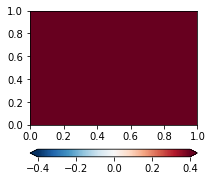

In [65]:
plt.figure(figsize =(3,3))
plt.pcolor(np.array(5)[np.newaxis,np.newaxis], vmax = 0.4,vmin = -0.4 ,cmap= "RdBu_r")
plt.colorbar(extend = "both",location="bottom")
plt.savefig("/home/vikram/BCSD_data/PCMCI_Walker/pcmci_plots/data_ncar/CB1.svg")


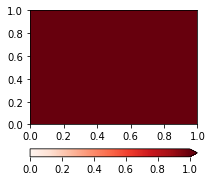

In [66]:
plt.figure(figsize =(3,3))
plt.pcolor(np.array(5)[np.newaxis,np.newaxis], vmax = 1,vmin = 0 ,cmap= "Reds")
plt.colorbar(extend = "max",location="bottom")
plt.savefig("/home/vikram/BCSD_data/PCMCI_Walker/pcmci_plots/data_ncar/CB2.svg")


In [49]:
path_out + '/pcmci_plots/data_ncar'

'/home/vikram/BCSD_data/PCMCI_Walker//pcmci_plots/data_ncar'

In [50]:
# mkdir -p /home/vikram/BCSD_data/PCMCI_Walker/pcmci_plots/data_ncar

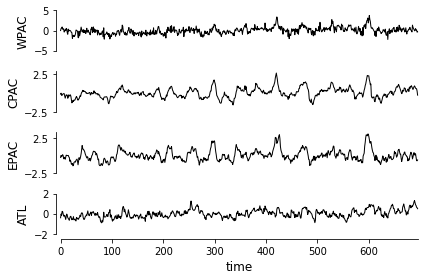


## Significant links at alpha = 0.05:

    Variable WPAC has 5 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.246
        (WPAC -2): pval = 0.00000 | qval = 0.00000 | val =  0.199
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.183
        (CPAC -1): pval = 0.00094 | qval = 0.01123 | val =  0.128
        (CPAC  0): pval = 0.00620 | qval = 0.00620 | val =  0.106

    Variable CPAC has 5 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.664
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.403
        (EPAC -1): pval = 0.00010 | qval = 0.00158 | val =  0.150
        (EPAC -3): pval = 0.00273 | qval = 0.02909 | val = -0.116
        (WPAC  0): pval = 0.00620 | qval = 0.00620 | val =  0.106

    Variable EPAC has 3 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.681
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.403
        (WPAC -1): pval = 0.00014 | qval = 0.00186 | val =  0.147

 

<Figure size 432x288 with 0 Axes>

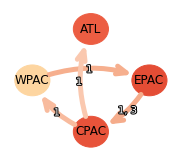

[[[False  True  True False False False False]
  [False False False False False False False]
  [False  True False False False False False]
  [False False False False False False False]]

 [[False  True False False False False False]
  [False  True False False False False False]
  [False False False False False False False]
  [False  True False False False False False]]

 [[False False False False False False False]
  [False  True False  True False False False]
  [False  True False False False False False]
  [False False False False False False False]]

 [[False False False False False False False]
  [False False False False False False False]
  [False False False False False False False]
  [False  True False False False False False]]]


In [70]:
data=data_ncar
alpha_sig=0.05
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
taumax=6
a,b,c,link_obs=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_ncar')
print(link_obs)


In [ ]:
(val_mat*link_obs)<=0 

In [88]:
print(link_obs)

[[[False  True  True False False False False]
  [False False False False False False False]
  [False  True False False False False False]
  [False False False False False False False]]

 [[False  True False False False False False]
  [False  True False False False False False]
  [False False False False False False False]
  [False  True False False False False False]]

 [[False False False False False False False]
  [False  True False  True False False False]
  [False  True False False False False False]
  [False False False False False False False]]

 [[False False False False False False False]
  [False False False False False False False]
  [False False False False False False False]
  [False  True False False False False False]]]


# PCMCI GCM

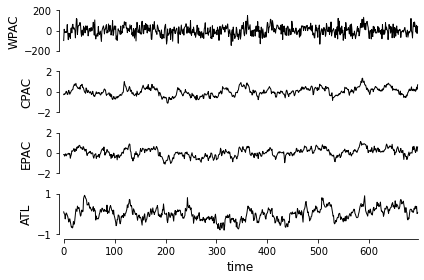


## Significant links at alpha = 0.05:

    Variable WPAC has 1 link(s):
        (WPAC -1): pval = 0.00014 | qval = 0.00274 | val =  0.146

    Variable CPAC has 3 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.563
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.406
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.200

    Variable EPAC has 3 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.582
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.406
        (ATL  0): pval = 0.00005 | qval = 0.00005 | val =  0.156

    Variable ATL has 2 link(s):
        (ATL -1): pval = 0.00000 | qval = 0.00000 | val =  0.646
        (EPAC  0): pval = 0.00005 | qval = 0.00005 | val =  0.156


<Figure size 432x288 with 0 Axes>

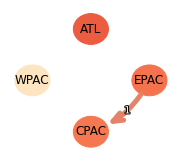

In [89]:
data=data_gcm_01
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,link_gcm=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_gcm_01')


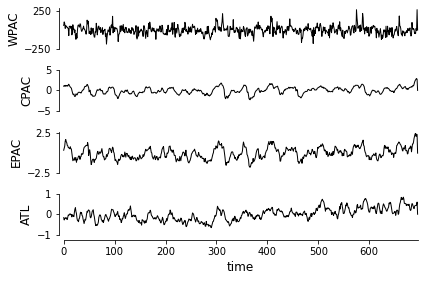


## Significant links at alpha = 0.05:

    Variable WPAC has 3 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.285
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.192
        (CPAC -1): pval = 0.00612 | qval = 0.04896 | val =  0.105

    Variable CPAC has 8 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.706
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.506
        (CPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.290
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.290
        (EPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.233
        (CPAC -3): pval = 0.00188 | qval = 0.01809 | val =  0.120
        (EPAC -4): pval = 0.00416 | qval = 0.03627 | val =  0.111
        (ATL  0): pval = 0.03106 | qval = 0.03106 | val =  0.083

    Variable EPAC has 4 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.576
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.506
   

<Figure size 432x288 with 0 Axes>

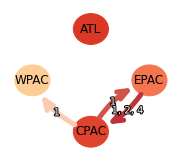

In [90]:
data=data_gcm_02
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_gcm_02')


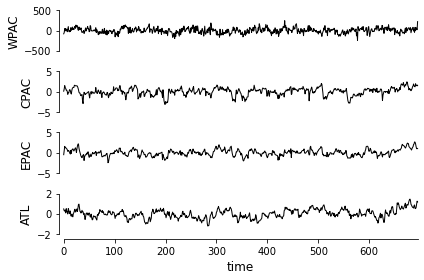


## Significant links at alpha = 0.05:

    Variable WPAC has 2 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.261
        (WPAC -2): pval = 0.00001 | qval = 0.00011 | val =  0.173

    Variable CPAC has 4 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.600
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.432
        (EPAC -1): pval = 0.00036 | qval = 0.00571 | val =  0.137
        (CPAC -2): pval = 0.00279 | qval = 0.03832 | val = -0.115

    Variable EPAC has 2 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.575
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.432

    Variable ATL has 2 link(s):
        (ATL -1): pval = 0.00000 | qval = 0.00000 | val =  0.703
        (ATL -2): pval = 0.00335 | qval = 0.04025 | val = -0.113


<Figure size 432x288 with 0 Axes>

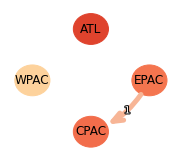

In [91]:
data=data_gcm_03
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']

a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_gcm_03')


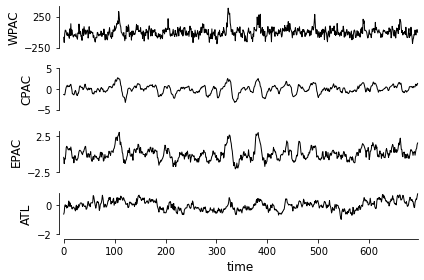


## Significant links at alpha = 0.05:

    Variable WPAC has 4 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.271
        (EPAC -1): pval = 0.00000 | qval = 0.00005 | val =  0.176
        (WPAC -2): pval = 0.00251 | qval = 0.01866 | val =  0.116
        (EPAC  0): pval = 0.00346 | qval = 0.00346 | val =  0.112

    Variable CPAC has 8 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.796
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.322
        (CPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.314
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.254
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.238
        (WPAC -3): pval = 0.00024 | qval = 0.00207 | val = -0.141
        (ATL -1): pval = 0.00281 | qval = 0.01929 | val =  0.115
        (WPAC -6): pval = 0.00465 | qval = 0.02908 | val = -0.109

    Variable EPAC has 6 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.553
  

<Figure size 432x288 with 0 Axes>

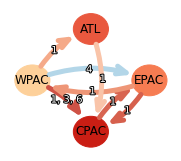

In [92]:
data=data_gcm_04
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']

a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_gcm_04')


# PCMCI BC

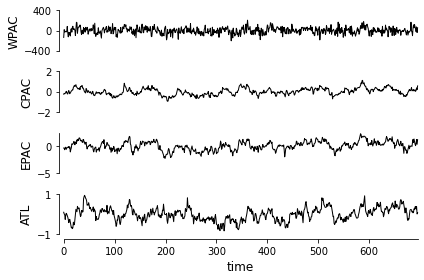


## Significant links at alpha = 0.05:

    Variable WPAC has 1 link(s):
        (WPAC -1): pval = 0.00014 | qval = 0.00274 | val =  0.146

    Variable CPAC has 3 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.563
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.406
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.200

    Variable EPAC has 3 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.582
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.406
        (ATL  0): pval = 0.00005 | qval = 0.00005 | val =  0.156

    Variable ATL has 2 link(s):
        (ATL -1): pval = 0.00000 | qval = 0.00000 | val =  0.646
        (EPAC  0): pval = 0.00005 | qval = 0.00005 | val =  0.156


<Figure size 432x288 with 0 Axes>

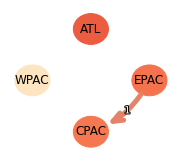

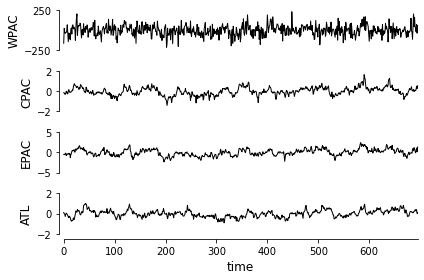


## Significant links at alpha = 0.05:

    Variable WPAC has 2 link(s):
        (WPAC -1): pval = 0.00021 | qval = 0.00515 | val =  0.142
        (EPAC -2): pval = 0.00200 | qval = 0.03206 | val =  0.119

    Variable CPAC has 4 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.573
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.322
        (EPAC -1): pval = 0.00047 | qval = 0.00900 | val =  0.135
        (ATL  0): pval = 0.02152 | qval = 0.02152 | val =  0.089

    Variable EPAC has 3 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.592
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.322
        (ATL  0): pval = 0.00007 | qval = 0.00007 | val =  0.152

    Variable ATL has 3 link(s):
        (ATL -1): pval = 0.00000 | qval = 0.00000 | val =  0.641
        (EPAC  0): pval = 0.00007 | qval = 0.00007 | val =  0.152
        (CPAC  0): pval = 0.02152 | qval = 0.02152 | val =  0.089


<Figure size 432x288 with 0 Axes>

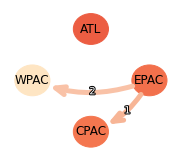

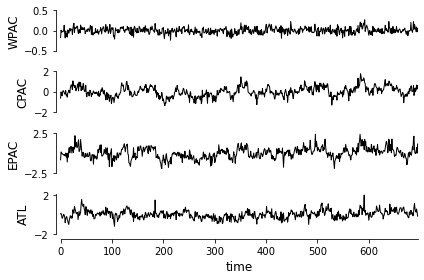


## Significant links at alpha = 0.05:

    Variable WPAC has 3 link(s):
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.392
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.261
        (EPAC -2): pval = 0.00060 | qval = 0.00718 | val =  0.132

    Variable CPAC has 6 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.415
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.261
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.214
        (EPAC -1): pval = 0.00005 | qval = 0.00092 | val =  0.156
        (EPAC  0): pval = 0.00012 | qval = 0.00012 | val =  0.147
        (WPAC -3): pval = 0.00269 | qval = 0.02586 | val = -0.116

    Variable EPAC has 4 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.408
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val = -0.226
        (CPAC  0): pval = 0.00012 | qval = 0.00012 | val =  0.147
        (CPAC -1): pval = 0.00031 | qval = 0.00419 | val =  0.139

   

<Figure size 432x288 with 0 Axes>

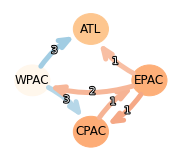

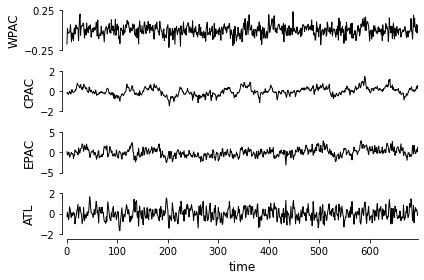


## Significant links at alpha = 0.05:

    Variable WPAC has 3 link(s):
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.501
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val = -0.401
        (WPAC -1): pval = 0.00024 | qval = 0.00286 | val =  0.141

    Variable CPAC has 6 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.600
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.382
        (WPAC -1): pval = 0.00004 | qval = 0.00070 | val =  0.157
        (ATL -1): pval = 0.00016 | qval = 0.00225 | val = -0.145
        (ATL -3): pval = 0.00029 | qval = 0.00314 | val = -0.139
        (CPAC -2): pval = 0.00453 | qval = 0.04347 | val = -0.109

    Variable EPAC has 4 link(s):
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val = -0.843
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.543
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val = -0.401
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.227

    V

<Figure size 432x288 with 0 Axes>

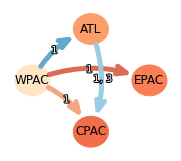

In [93]:
data=data_bc_01
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,link_ubc=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_01')

data=data_eqm__bc_01
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,link_ubc=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_eqm_bc_01')


data=adata_mbc_gcm_01
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbc_01')

data=adata_mbcp_gcm_01
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbcp_01')



In [94]:

    
# np.savez('./walker',link_obs =link_obs,link_gcm =link_gcm, link_ubc = link_ubc)

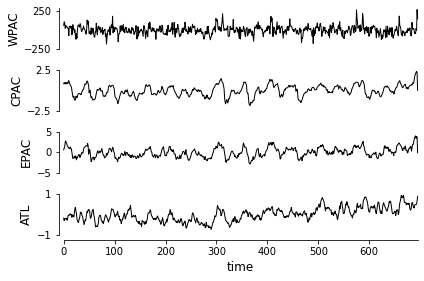


## Significant links at alpha = 0.05:

    Variable WPAC has 4 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.296
        (ATL  0): pval = 0.00001 | qval = 0.00001 | val =  0.173
        (CPAC -1): pval = 0.00710 | qval = 0.04994 | val =  0.104
        (EPAC -6): pval = 0.00728 | qval = 0.04994 | val =  0.103

    Variable CPAC has 7 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.706
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.509
        (CPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.290
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.290
        (EPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.233
        (CPAC -3): pval = 0.00186 | qval = 0.01787 | val =  0.120
        (EPAC -4): pval = 0.00413 | qval = 0.03305 | val =  0.111

    Variable EPAC has 4 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.574
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.509
  

<Figure size 432x288 with 0 Axes>

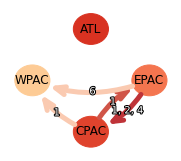

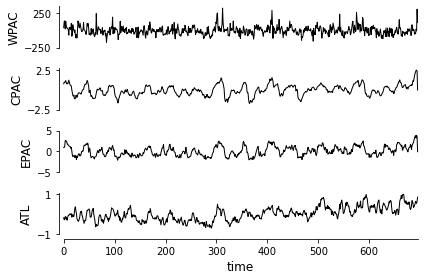


## Significant links at alpha = 0.05:

    Variable WPAC has 2 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.276
        (ATL  0): pval = 0.00001 | qval = 0.00001 | val =  0.168

    Variable CPAC has 5 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.701
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.496
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.281
        (CPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.261
        (EPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.212

    Variable EPAC has 7 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.563
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.496
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.212
        (EPAC -2): pval = 0.00001 | qval = 0.00007 | val = -0.173
        (ATL -2): pval = 0.00036 | qval = 0.00345 | val =  0.137
        (EPAC -3): pval = 0.00096 | qval = 0.00835 | val =  0.127
   

<Figure size 432x288 with 0 Axes>

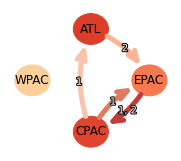

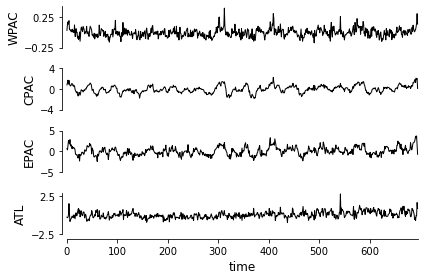


## Significant links at alpha = 0.05:

    Variable WPAC has 4 link(s):
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.457
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.343
        (WPAC -1): pval = 0.00000 | qval = 0.00003 | val =  0.181
        (EPAC -6): pval = 0.00074 | qval = 0.00890 | val =  0.130

    Variable CPAC has 6 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.587
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.343
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.283
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.221
        (ATL  0): pval = 0.00005 | qval = 0.00005 | val =  0.156
        (ATL -6): pval = 0.00017 | qval = 0.00230 | val =  0.145

    Variable EPAC has 4 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.424
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val = -0.417
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.233
     

<Figure size 432x288 with 0 Axes>

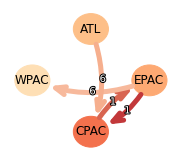

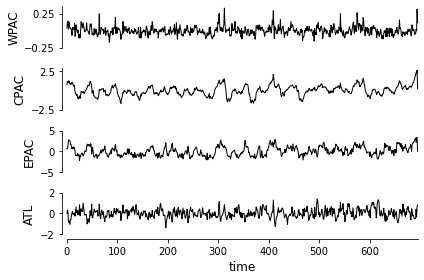


## Significant links at alpha = 0.05:

    Variable WPAC has 4 link(s):
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.579
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.500
        (WPAC -1): pval = 0.00000 | qval = 0.00005 | val =  0.175
        (EPAC  0): pval = 0.00045 | qval = 0.00045 | val =  0.135

    Variable CPAC has 10 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.701
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.579
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val = -0.427
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.310
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.273
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.225
        (CPAC -2): pval = 0.00000 | qval = 0.00002 | val = -0.186
        (ATL -2): pval = 0.00000 | qval = 0.00003 | val =  0.181
        (WPAC -2): pval = 0.00078 | qval = 0.00679 | val =  0.130
        (EPAC -5): pval = 0.00555 | q

<Figure size 432x288 with 0 Axes>

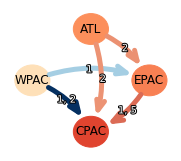

In [95]:
data=data_bc_02
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_02')

data=data_eqm__bc_02
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,link_ubc=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_eqm_bc_02')



data=adata_mbc_gcm_02
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbc_02')
data=adata_mbcp_gcm_02
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbcp_02')


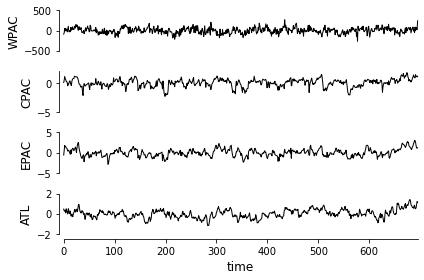


## Significant links at alpha = 0.05:

    Variable WPAC has 2 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.261
        (WPAC -2): pval = 0.00001 | qval = 0.00011 | val =  0.173

    Variable CPAC has 4 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.600
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.432
        (EPAC -1): pval = 0.00036 | qval = 0.00571 | val =  0.137
        (CPAC -2): pval = 0.00279 | qval = 0.03832 | val = -0.115

    Variable EPAC has 2 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.575
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.432

    Variable ATL has 2 link(s):
        (ATL -1): pval = 0.00000 | qval = 0.00000 | val =  0.703
        (ATL -2): pval = 0.00336 | qval = 0.04028 | val = -0.113


<Figure size 432x288 with 0 Axes>

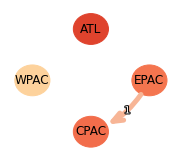

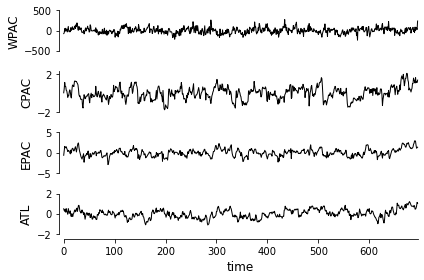


## Significant links at alpha = 0.05:

    Variable WPAC has 2 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.269
        (WPAC -2): pval = 0.00002 | qval = 0.00038 | val =  0.163

    Variable CPAC has 4 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.607
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.422
        (EPAC -1): pval = 0.00004 | qval = 0.00059 | val =  0.158
        (CPAC -2): pval = 0.00202 | qval = 0.02771 | val = -0.118

    Variable EPAC has 2 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.550
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.422

    Variable ATL has 1 link(s):
        (ATL -1): pval = 0.00000 | qval = 0.00000 | val =  0.678


<Figure size 432x288 with 0 Axes>

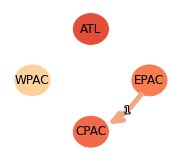

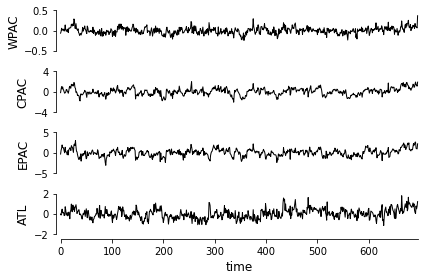


## Significant links at alpha = 0.05:

    Variable WPAC has 6 link(s):
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.581
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.483
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.301
        (WPAC -1): pval = 0.00000 | qval = 0.00004 | val =  0.184
        (CPAC -1): pval = 0.00016 | qval = 0.00264 | val =  0.144
        (WPAC -2): pval = 0.00029 | qval = 0.00353 | val =  0.139

    Variable CPAC has 6 link(s):
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.610
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.581
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.395
        (EPAC -1): pval = 0.00011 | qval = 0.00216 | val =  0.148
        (ATL  0): pval = 0.00037 | qval = 0.00037 | val =  0.137
        (ATL -3): pval = 0.00294 | qval = 0.03131 | val =  0.115

    Variable EPAC has 5 link(s):
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.610
    

<Figure size 432x288 with 0 Axes>

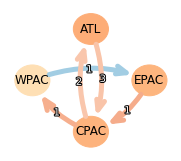

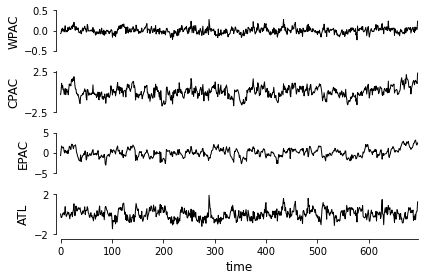


## Significant links at alpha = 0.05:

    Variable WPAC has 5 link(s):
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.785
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.710
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.299
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.270
        (WPAC -2): pval = 0.00003 | qval = 0.00030 | val =  0.159

    Variable CPAC has 6 link(s):
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.710
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.684
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.294
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.283
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val = -0.208
        (EPAC -1): pval = 0.00001 | qval = 0.00017 | val =  0.166

    Variable EPAC has 6 link(s):
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.684
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.628
   

<Figure size 432x288 with 0 Axes>

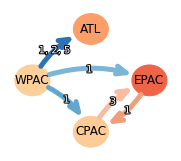

In [96]:
data=data_bc_03
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_03')

data=data_eqm__bc_03
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,link_ubc=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_eqm_bc_03')



data=adata_mbc_gcm_03
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbc_03')
data=adata_mbcp_gcm_03
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbcp_03')


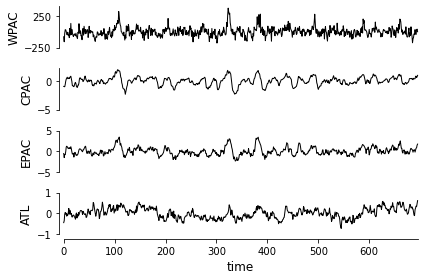


## Significant links at alpha = 0.05:

    Variable WPAC has 4 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.271
        (EPAC -1): pval = 0.00000 | qval = 0.00005 | val =  0.176
        (WPAC -2): pval = 0.00251 | qval = 0.01866 | val =  0.116
        (EPAC  0): pval = 0.00346 | qval = 0.00346 | val =  0.112

    Variable CPAC has 8 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.796
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.322
        (CPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.314
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.254
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.238
        (WPAC -3): pval = 0.00024 | qval = 0.00207 | val = -0.141
        (ATL -1): pval = 0.00281 | qval = 0.01929 | val =  0.115
        (WPAC -6): pval = 0.00465 | qval = 0.02908 | val = -0.109

    Variable EPAC has 6 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.553
  

<Figure size 432x288 with 0 Axes>

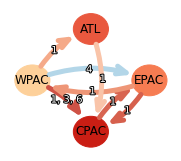

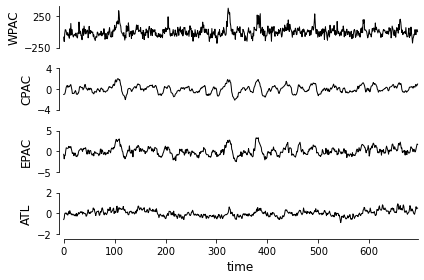


## Significant links at alpha = 0.05:

    Variable WPAC has 4 link(s):
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.273
        (EPAC -1): pval = 0.00002 | qval = 0.00021 | val =  0.163
        (WPAC -2): pval = 0.00608 | qval = 0.03561 | val =  0.106
        (EPAC  0): pval = 0.02355 | qval = 0.02355 | val =  0.087

    Variable CPAC has 7 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.732
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.349
        (CPAC -2): pval = 0.00000 | qval = 0.00000 | val = -0.293
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.277
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.224
        (WPAC -3): pval = 0.00009 | qval = 0.00078 | val = -0.151
        (WPAC -6): pval = 0.00347 | qval = 0.02559 | val = -0.113

    Variable EPAC has 8 link(s):
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.504
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.349
 

<Figure size 432x288 with 0 Axes>

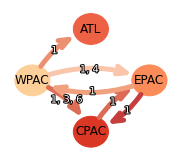

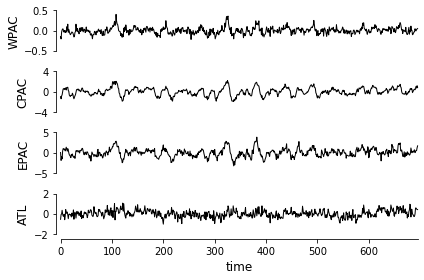


## Significant links at alpha = 0.05:

    Variable WPAC has 8 link(s):
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.464
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.219
        (WPAC -1): pval = 0.00000 | qval = 0.00002 | val =  0.184
        (EPAC -1): pval = 0.00000 | qval = 0.00004 | val =  0.179
        (CPAC -1): pval = 0.00020 | qval = 0.00234 | val =  0.143
        (WPAC -5): pval = 0.00057 | qval = 0.00604 | val = -0.132
        (ATL  0): pval = 0.00147 | qval = 0.00147 | val =  0.122
        (WPAC -2): pval = 0.00591 | qval = 0.04731 | val =  0.106

    Variable CPAC has 5 link(s):
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.546
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.464
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.393
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.266
        (ATL -1): pval = 0.00462 | qval = 0.04032 | val =  0.109

    Variable EPAC has 5 link(s):
   

<Figure size 432x288 with 0 Axes>

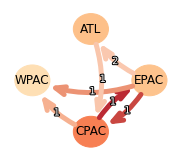

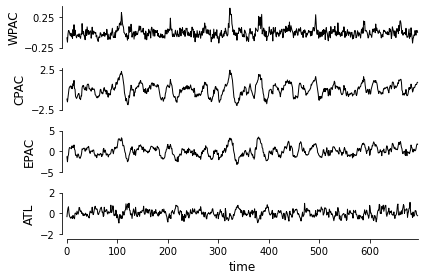


## Significant links at alpha = 0.05:

    Variable WPAC has 6 link(s):
        (CPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.717
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.448
        (ATL  0): pval = 0.00000 | qval = 0.00000 | val =  0.263
        (WPAC -1): pval = 0.00000 | qval = 0.00001 | val =  0.190
        (WPAC -2): pval = 0.00110 | qval = 0.00880 | val =  0.125
        (EPAC -1): pval = 0.00269 | qval = 0.01988 | val =  0.115

    Variable CPAC has 7 link(s):
        (WPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.717
        (EPAC  0): pval = 0.00000 | qval = 0.00000 | val =  0.593
        (CPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.546
        (WPAC -1): pval = 0.00000 | qval = 0.00000 | val = -0.321
        (EPAC -1): pval = 0.00000 | qval = 0.00000 | val =  0.279
        (WPAC -2): pval = 0.00062 | qval = 0.00541 | val =  0.132
        (ATL  0): pval = 0.00944 | qval = 0.00944 | val =  0.100

    Variable EPAC has 8 link(s):
   

<Figure size 432x288 with 0 Axes>

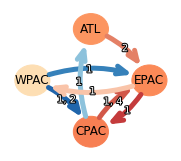

In [97]:
data=data_bc_04
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_04')

data=data_eqm__bc_04
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,link_ubc=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_eqm_bc_04')


data=adata_mbc_gcm_04

data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbc_04')
data=adata_mbcp_gcm_04
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_mbcp_04')


# F1 score

In [98]:
fname =path_out + '/pcmci_plots/data_mbcp_04'
np.load(fname+'_val_mat.npy');


In [99]:
link_mat_ref = np.any(np.load(path_link + 'data_ncar.npy'),axis= 2).flatten()


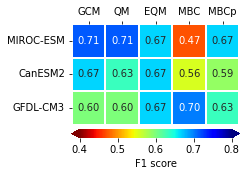

In [217]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


plt.figure(figsize =(3,3))

path_link ='/home/vikram/BCSD_data/PCMCI_Walker/pcmci_plots/'
# link_mat_ref = np.any(np.load(path_link + 'data_ncar.npy'),axis= 2).flatten()
link_mat_ref = np.load(path_link + 'data_ncar_link_mat.npy')
val_mat_ref = np.load(path_link + 'data_ncar_val_mat.npy')

mat_f1 = np.zeros((5,4))  ## mthods  x gcms
for miter,method in enumerate(['gcm','bc','eqm_bc','mbc','mbcp']):
    for gcm_no in range(4):
        
        link_mat  = np.load(path_link+ 'data_' + method +'_0' + str(gcm_no+1) +'_link_mat.npy')
        val_mat  = np.load(path_link+ 'data_' + method +'_0' + str(gcm_no+1) +'_val_mat.npy')
        
        link_all= link_mat.flatten()
        model = np.sign(link_mat * val_mat).flatten() == 1
        ref = np.sign(link_mat_ref * val_mat_ref).flatten() == 1
        
        mat_f1[miter , gcm_no] =   f1_score(ref,model)


import seaborn as sns
h=sns.heatmap(mat_f1[:,(0,1,3)].T, linewidth = 2 , cmap = 'jet_r', 
          annot=True,
          fmt=".2f", square=True,
          yticklabels=['MIROC-ESM','CanESM2','GFDL-CM3'],
          xticklabels=['GCM','QM','EQM','MBC','MBCp'],vmin=0.4,vmax=0.8,
          cbar_kws={'label': 'F1 score','extend':None,'shrink':1,'extend':'both','location':'bottom','pad':0.03},cbar = True)
plt.gca().xaxis.tick_top() # x axis on top
# plt.ylabel('GCMs')
plt.title('')
plt.savefig('f1_scores.svg')

In [152]:
from sklearn.metrics import confusion_matrix

model = np.sign(link_mat * val_mat).flatten() == 1
ref = np.sign(link_mat_ref * val_mat_ref) == 1

cmat = confusion_matrix(ref,model)
print(cmat) # how many 2s were predicted as 1s


# TP = cmat[2,2]
# FP = cmat[0,2] + cmat[1,2]
# FN = cmat[2,0] + cmat[2,1]

# Precision = TP/(TP +FP)
# Recall =TP/(TP+FN)

# f1_sc = 2* Precision * Recall /(Precision +Recall)
f1_sc,f1_score(c,d)

[[99  4]
 [ 3  6]]


(0.631578947368421, 0.631578947368421)

In [145]:
b

array([ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [142]:
from sklearn.metrics import f1_score


plt.figure(figsize =(4,4))

path_link ='/home/vikram/BCSD_data/PCMCI_Walker/pcmci_plots/'
link_mat_ref = np.any(np.load(path_link + 'data_ncar.npy'),axis= 2).flatten()
link_mat_ref = np.load(path_link + 'data_ncar.npy').flatten()

mat_f1 = np.zeros((5,4))  ## mthods  x gcms
for miter,method in enumerate(['gcm','bc','eqm_bc','mbc','mbcp']):
    for gcm_no in range(4):
        
        link_mat  = np.load(path_link+ 'data_' + method +'_0' + strcm_no+1) +'.npy')
        print(link_mat.shape)
        link_all= np.any(link_mat,axis= 2).flatten()
        link_all= link_mat.flatten()
        
        mat_f1[miter , gcm_no] =   f1_score(link_mat_ref,link_all)


import seaborn as sns
h=sns.heatmap(mat_f1[:,(0,1,3)].T, linewidth = 2 , cmap = 'Greens', 
          annot=True,
          fmt=".2f", square=True,
          yticklabels=['M','C','G'],
          xticklabels=['GCM','QM','EQM','MBC','MBCp'],vmin=0,vmax=1,
             
          cbar_kws={'label': 'f1 score','extend':None},cbar = True)
plt.ylabel('GCMs')
plt.title('F1 score')
plt.savefig('f1_scores.svg')

SyntaxError: unmatched ')' (2988776088.py, line 14)

In [ ]:
np.save(fname+'_val_mat',link_matrix);


# PCMCI RND BC

In [73]:
data=data_bc_rnd_01
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_rnd_01')



NameError: name 'data_bc_rnd_01' is not defined

In [ ]:
data=data_bc_rnd_02
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_rnd_02')


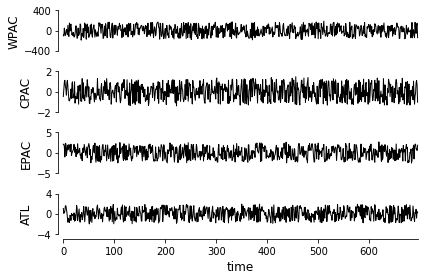


## Significant links at alpha = 0.05:

    Variable WPAC has 0 link(s):

    Variable CPAC has 0 link(s):

    Variable EPAC has 1 link(s):
        (ATL  0): pval = 0.03712 | qval = 0.03712 | val = -0.080

    Variable ATL has 1 link(s):
        (EPAC  0): pval = 0.03712 | qval = 0.03712 | val = -0.080


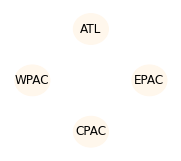

In [ ]:
data=data_bc_rnd_03
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']
a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_rnd_03')


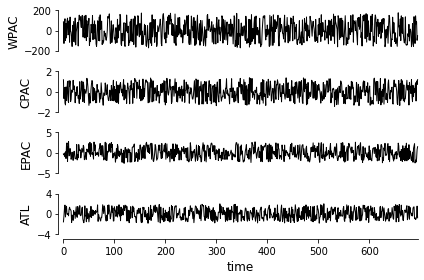


## Significant links at alpha = 0.05:

    Variable WPAC has 0 link(s):

    Variable CPAC has 0 link(s):

    Variable EPAC has 0 link(s):

    Variable ATL has 1 link(s):
        (EPAC -4): pval = 0.00025 | qval = 0.02367 | val = -0.140


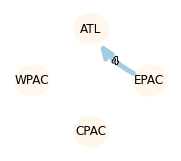

In [ ]:
data=data_bc_rnd_04
data[np.isnan(data)]=0
var_names = [r'WPAC', r'CPAC', r'EPAC', r'ATL']

a,b,c,d=pcmci_parcorr(data,var_names,alpha_sig,taumax,path_out + '/pcmci_plots/data_bc_rnd_04')


# CMI

In [ ]:
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks')
pcmci_cmi_knn = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=cmi_knn)
results = pcmci_cmi_knn.run_pcmci(tau_max=6, pc_alpha=0.05)
pcmci_cmi_knn.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable WPAC has 1 link(s):
        (WPAC -1): pval = 0.00000 | val =  0.043

    Variable CPAC has 2 link(s):
        (CPAC -1): pval = 0.00000 | val =  0.076
        (EPAC  0): pval = 0.00200 | val =  0.012

    Variable EPAC has 2 link(s):
        (EPAC -1): pval = 0.00000 | val =  0.053
        (CPAC  0): pval = 0.00200 | val =  0.012

    Variable ATL has 4 link(s):
        (ATL -1): pval = 0.00000 | val =  0.112
        (ATL -6): pval = 0.00000 | val =  0.021
        (ATL -5): pval = 0.00000 | val =  0.015
        (CPAC -6): pval = 0.00000 | val =  0.006


In [ ]:
link_matrix = pcmci_cmi_knn.return_significant_links(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']

In [ ]:
np.save(path_out + '/results_matrix',results)
np.save(path_out + '/link_matrix',link_matrix)

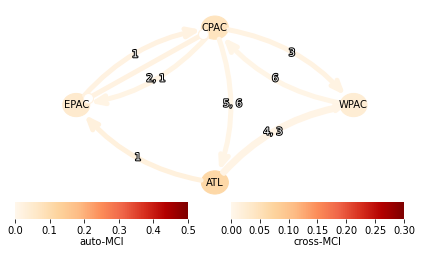

In [ ]:
link_matrix = pcmci_cmi_knn.return_significant_links(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='OrRd',
    ); plt.show()

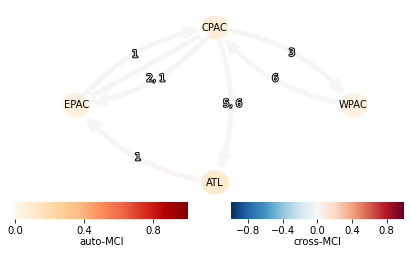

In [ ]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI'
    ); plt.show()